## Importing Library

In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading Data


In [2]:
#Loading the data
df =pd.read_csv('Cars.csv')

In [3]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [4]:
# Shape of the data
df.shape

(8128, 13)

In [5]:
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
# Renaming the name to brand and splitting 
df.rename(columns ={
    'name':'brand'
}, inplace=True)

df['brand'] = df['brand'].str.split().str[0]
df

brand  year  selling_price  km_driven    fuel seller_type  \
0      Maruti  2014         450000     145500  Diesel  Individual   
1       Skoda  2014         370000     120000  Diesel  Individual   
2       Honda  2006         158000     140000  Petrol  Individual   
3     Hyundai  2010         225000     127000  Diesel  Individual   
4      Maruti  2007         130000     120000  Petrol  Individual   
...       ...   ...            ...        ...     ...         ...   
8123  Hyundai  2013         320000     110000  Petrol  Individual   
8124  Hyundai  2007         135000     119000  Diesel  Individual   
8125   Maruti  2009         382000     120000  Diesel  Individual   
8126     Tata  2013         290000      25000  Diesel  Individual   
8127     Tata  2013         290000      25000  Diesel  Individual   

     transmission                 owner     mileage   engine   max_power  \
0          Manual           First Owner   23.4 kmpl  1248 CC      74 bhp   
1          Manual          Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2          Manual           Third Owner   17.7 kmpl  1497 CC      78 bhp   
3          Manual           First Owner   23.0 kmpl  1396 CC      90 bhp   
4          Manual           First Owner   16.1 kmpl  1298 CC    88.2 bhp   
...           ...                   ...         ...      ...         ...   
8123       Manual           First Owner   18.5 kmpl  1197 CC   82.85 bhp   
8124       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC     110 bhp   
8125       Manual           First Owner   19.3 kmpl  1248 CC    73.9 bhp   
8126       Manual           First Owner  23.57 kmpl  1396 CC      70 bhp   
8127       Manual           First Owner  23.57 kmpl  1396 CC      70 bhp   

                         torque  seats  
0                190Nm@ 2000rpm    5.0  
1           250Nm@ 1500-2500rpm    5.0  
2         12.7@ 2,700(kgm@ rpm)    5.0  
3      22.4 kgm at 1750-2750rpm    5.0  
4         11.5@ 4,500(kgm@ rpm)    5.0  
...                         ...    ...  
8123           113.7Nm@ 4000rpm    5.0  
8124  24@ 1,900-2,750(kgm@ rpm)    5.0  
8125             190Nm@ 2000rpm    5.0  
8126        140Nm@ 1800-3000rpm    5.0  
8127        140Nm@ 1800-3000rpm    5.0  

[8128 rows x 13 columns]

## Mapping

In [8]:
map={
       'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

In [9]:
df['owner']= df['owner'].map(map)

In [10]:
df['owner'].unique()

array([1, 2, 3, 4, 5])

## Removing all rows with CNG and LPG

In [11]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [12]:
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [13]:
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

## Removing "kmpl" and convert the column to numerical type 

In [14]:
df['mileage'].dtype

dtype('O')

In [15]:
df['mileage']=df.mileage.str.split().str[0]

In [16]:
df['mileage']=df['mileage'].astype(float)

In [17]:
df['mileage'].dtypes

dtype('float64')

## Removing CC and convert column to numerical type

In [18]:
df['engine']=df['engine'].str.split().str[0]

In [19]:
df['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

## Max Power

In [20]:
df['max_power']=df.max_power.str.split().str[0]

In [21]:
df['max_power'].head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [22]:
df=df.drop(['torque'],axis=1)

In [23]:
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage engine max_power  seats  
0      1    23.40   1248        74    5.0  
1      2    21.14   1498    103.52    5.0  
2      3    17.70   1497        78    5.0  
3      1    23.00   1396        90    5.0  
4      1    16.10   1298      88.2    5.0

## Removing Owner

In [24]:
df = df[df['owner'] != 5]

In [25]:
df['owner'].unique()

array([1, 2, 3, 4])

In [26]:
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage engine max_power  seats  
0      1    23.40   1248        74    5.0  
1      2    21.14   1498    103.52    5.0  
2      3    17.70   1497        78    5.0  
3      1    23.00   1396        90    5.0  
4      1    16.10   1298      88.2    5.0

In [27]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['fuel'].unique())


['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['Diesel' 'Petrol']


In [28]:
df_copy=df
df_copy.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage engine max_power  seats  
0      1    23.40   1248        74    5.0  
1      2    21.14   1498    103.52    5.0  
2      3    17.70   1497        78    5.0  
3      1    23.00   1396        90    5.0  
4      1    16.10   1298      88.2    5.0

## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder_brand = LabelEncoder()
label_encoder_fuel = LabelEncoder()
label_encoder_transmission = LabelEncoder()
label_encoder_seller_type = LabelEncoder()

df['brand'] = label_encoder_brand.fit_transform(df['brand'])
df['fuel'] = label_encoder_fuel.fit_transform(df['fuel'])
df['transmission'] = label_encoder_transmission.fit_transform(df['transmission'])
df['seller_type'] = label_encoder_seller_type.fit_transform(df['seller_type'])

df.head()

brand  year  selling_price  km_driven  fuel  seller_type  transmission  \
0     20  2014         450000     145500     0            1             1   
1     27  2014         370000     120000     0            1             1   
2     10  2006         158000     140000     1            1             1   
3     11  2010         225000     127000     0            1             1   
4     20  2007         130000     120000     1            1             1   

   owner  mileage engine max_power  seats  
0      1    23.40   1248        74    5.0  
1      2    21.14   1498    103.52    5.0  
2      3    17.70   1497        78    5.0  
3      1    23.00   1396        90    5.0  
4      1    16.10   1298      88.2    5.0

In [30]:
label_encoder_fuel.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [31]:
# Fuel mapping
fuel_mapping = dict(zip(label_encoder_fuel.classes_, label_encoder_fuel.transform(label_encoder_fuel.classes_)))
print("Fuel mapping:", fuel_mapping)

# Seller Type mapping
seller_type_mapping = dict(zip(label_encoder_seller_type.classes_, label_encoder_seller_type.transform(label_encoder_seller_type.classes_)))
print("Seller Type mapping:", seller_type_mapping)

# Transmission mapping
transmission_mapping = dict(zip(label_encoder_transmission.classes_, label_encoder_transmission.transform(label_encoder_transmission.classes_)))
print("Transmission mapping:", transmission_mapping)


Fuel mapping: {'Diesel': np.int64(0), 'Petrol': np.int64(1)}
Seller Type mapping: {'Dealer': np.int64(0), 'Individual': np.int64(1), 'Trustmark Dealer': np.int64(2)}
Transmission mapping: {'Automatic': np.int64(0), 'Manual': np.int64(1)}


## EXPLORATORY DATA ANALYSIS

In [32]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [33]:
df.head()

brand  year  selling_price  km_driven  fuel  seller_type  transmission  \
0     20  2014         450000     145500     0            1             1   
1     27  2014         370000     120000     0            1             1   
2     10  2006         158000     140000     1            1             1   
3     11  2010         225000     127000     0            1             1   
4     20  2007         130000     120000     1            1             1   

   owner  mileage engine max_power  seats  
0      1    23.40   1248        74    5.0  
1      2    21.14   1498    103.52    5.0  
2      3    17.70   1497        78    5.0  
3      1    23.00   1396        90    5.0  
4      1    16.10   1298      88.2    5.0

## Univarite Analysis

### Discreate Data

<Axes: xlabel='seller_type', ylabel='count'>

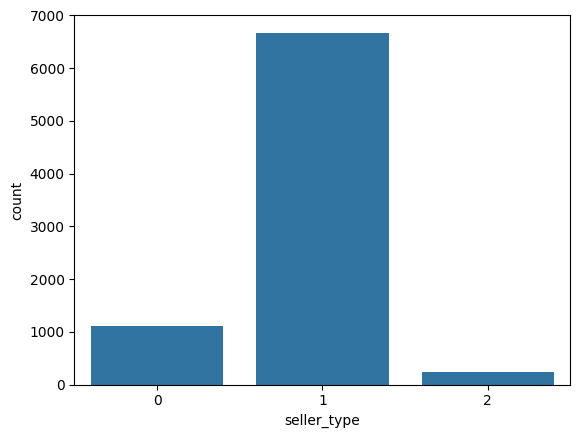

In [34]:
sns.countplot(data=df,x='seller_type')

#Here 

<Axes: xlabel='fuel', ylabel='count'>

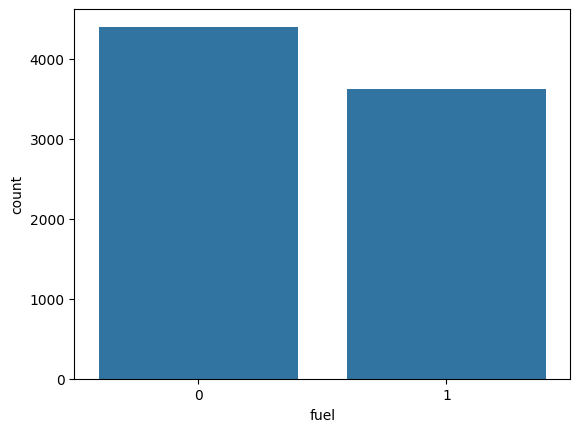

In [35]:
sns.countplot(data=df,x='fuel')

#Here 0 is petrol cars and 1 is diseal cars

<Axes: xlabel='transmission', ylabel='count'>

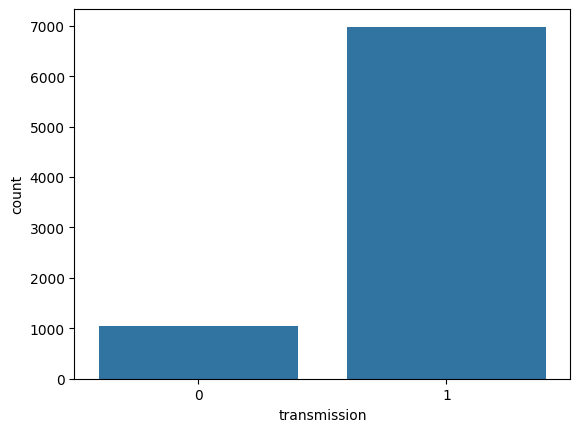

In [36]:
sns.countplot(data=df, x='transmission')


<Axes: xlabel='owner', ylabel='count'>

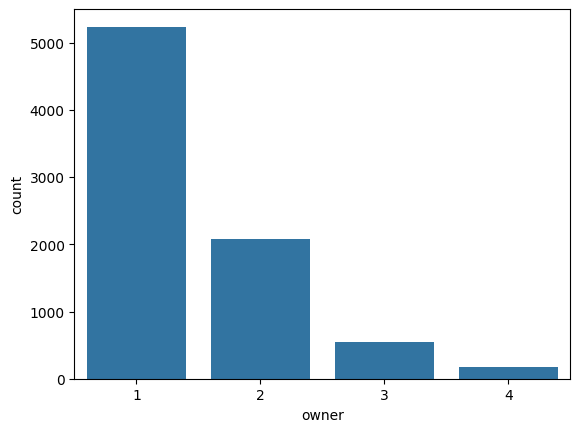

In [37]:
sns.countplot(data=df,x='owner')

<Axes: xlabel='seats', ylabel='count'>

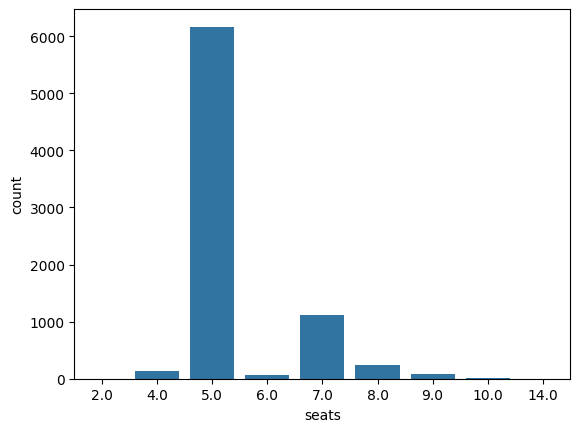

In [38]:
sns.countplot(data=df,x='seats')

### Continous Data

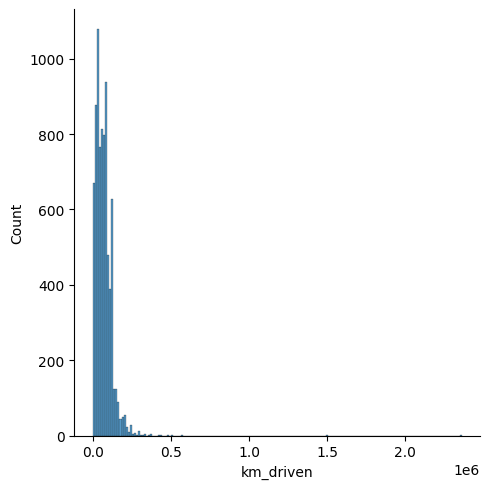

In [39]:
sns.displot(data = df, x = 'km_driven')

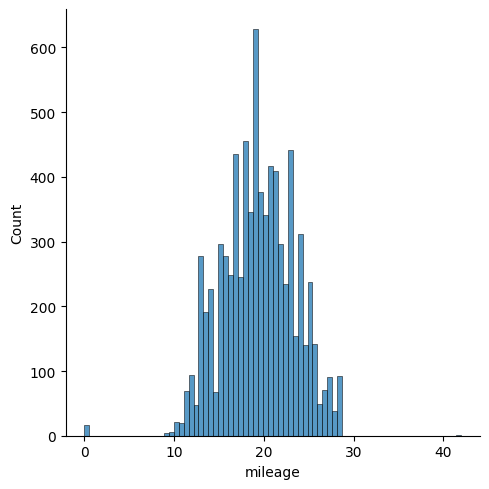

In [40]:
sns.displot(data=df,x='mileage')

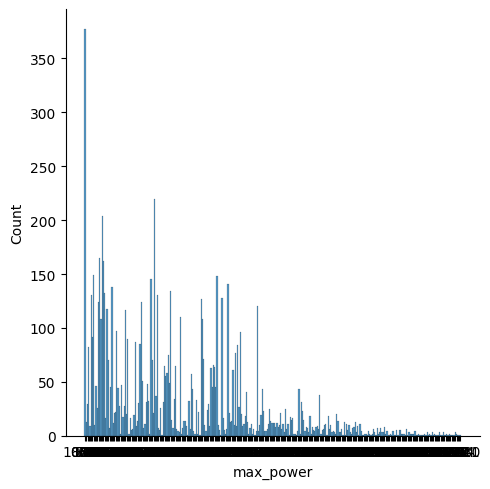

In [41]:
sns.displot (data=df,x='max_power')

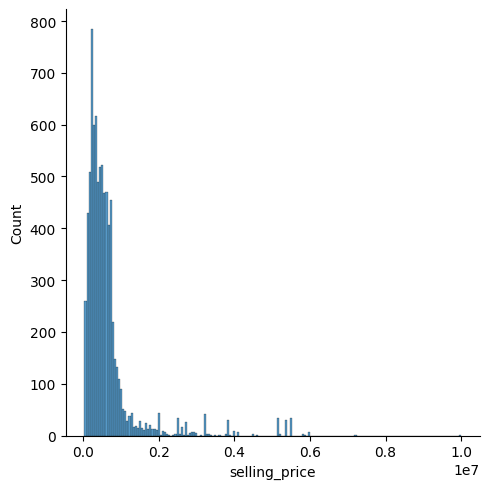

In [42]:
sns.displot (data=df,x='selling_price')

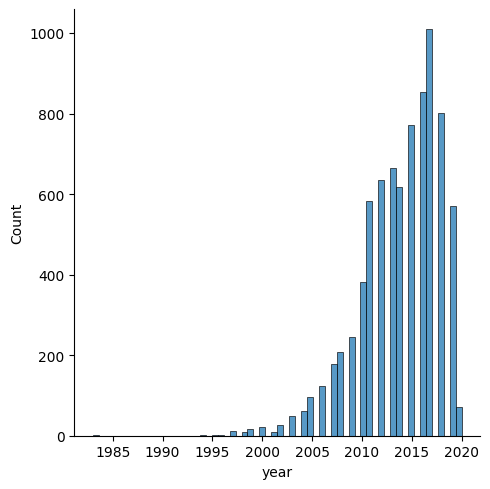

In [43]:
sns.displot(data=df,x='year')

## Multivarte Analysis

In [44]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

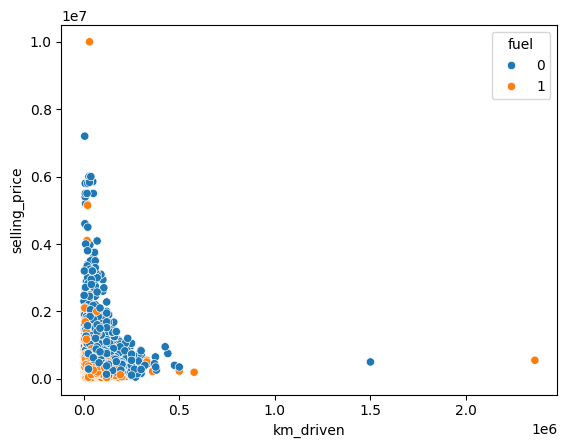

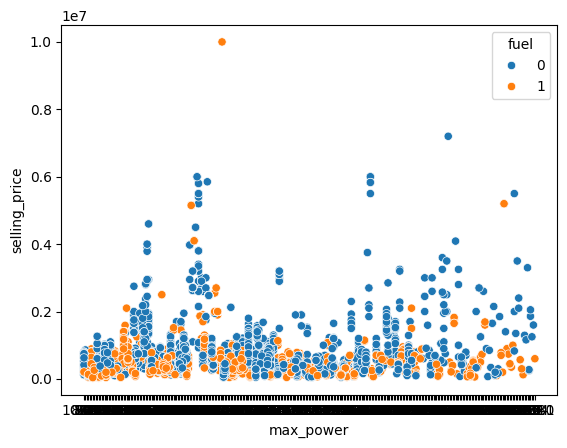

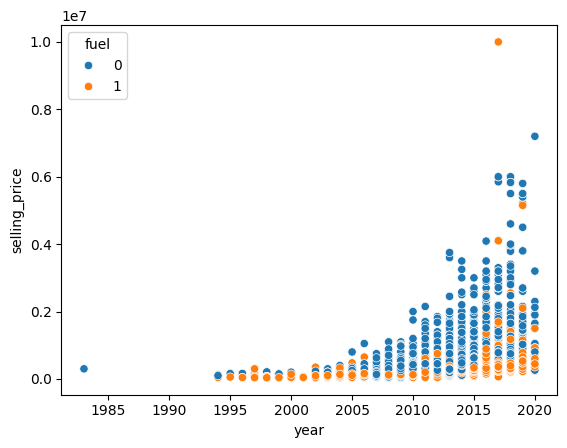

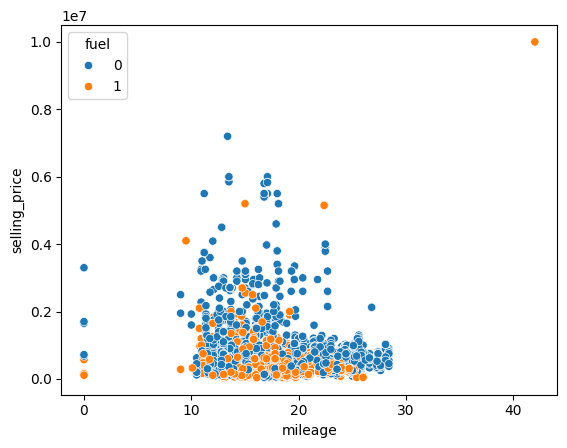

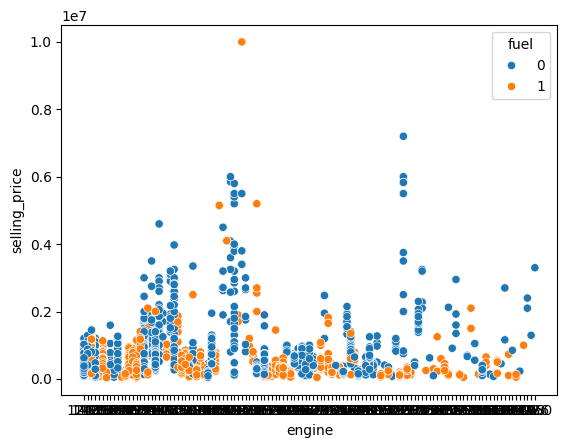

In [45]:
continuous_cols = [ 'km_driven', 'max_power','year','mileage','engine']

for col in continuous_cols:
    sns.scatterplot(data=df, x=col, y='selling_price', hue='fuel')
    plt.show()

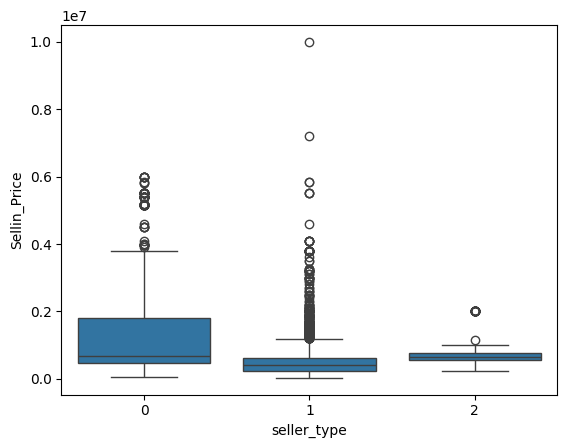

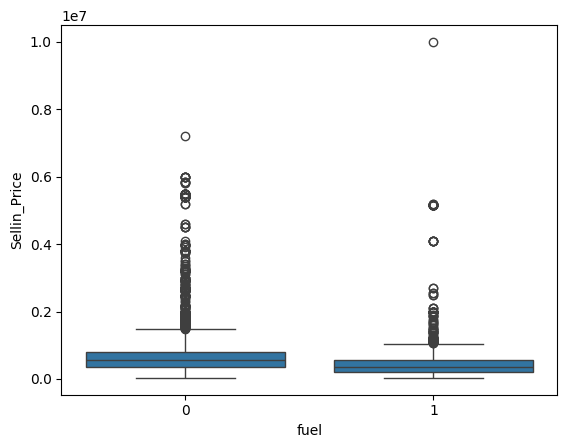

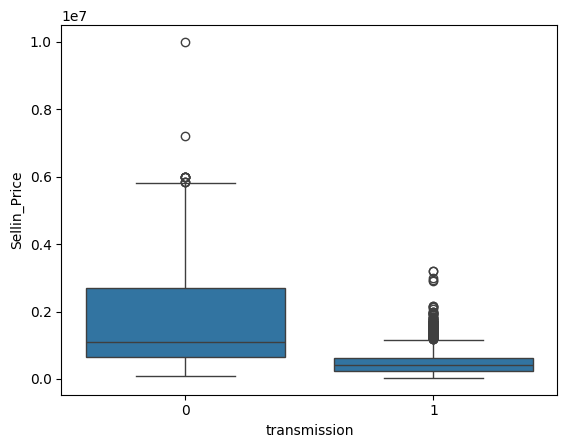

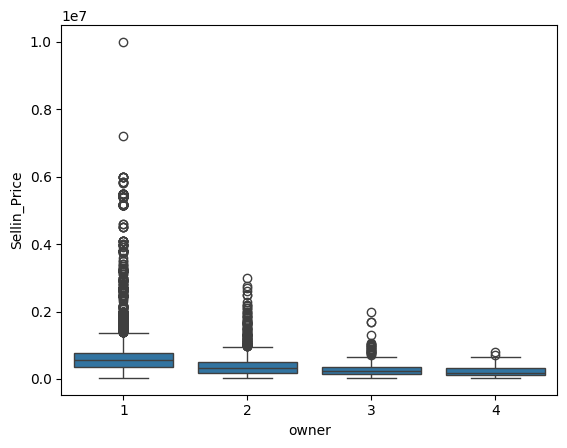

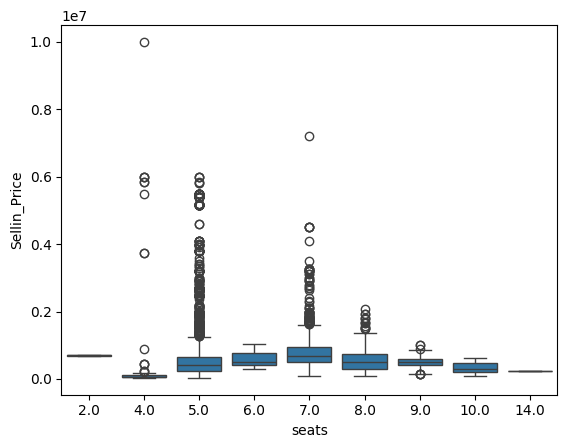

In [46]:
discrete_cols = ['seller_type', 'fuel', 'transmission', 'owner','seats']

for dis in discrete_cols:
    sns.boxplot(x=dis, y='selling_price', data=df)
    plt.ylabel('Sellin_Price')
    plt.xlabel(dis)
    plt.show()



## Colrelation Matrix

<Axes: >

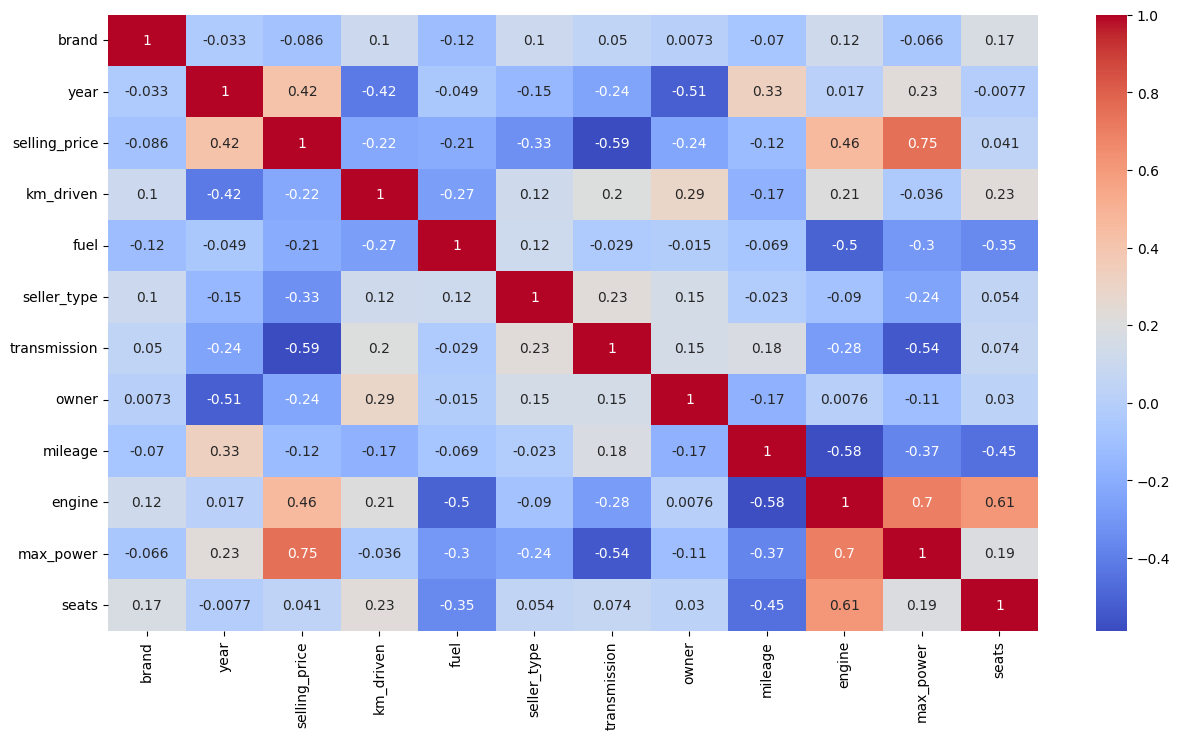

In [47]:
plt.figure(figsize=(15,8))

#Checking out the heat map
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Feature Selection

In [48]:
X=df[['max_power','mileage','fuel','brand','year','km_driven']]

y = np.log(df['selling_price'])

## Splitting the data into test and train sets

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Preprocessing 

### Null Value

In [50]:
missing_values_X_train = X_train.isna().sum()
print(missing_values_X_train)

max_power    165
mileage      171
fuel           0
brand          0
year           0
km_driven      0
dtype: int64


In [51]:
missing_values_X_test= X_test.isna().sum()
print(missing_values_X_test)

max_power    43
mileage      43
fuel          0
brand         0
year          0
km_driven     0
dtype: int64


In [52]:
y_train.isna().sum()

np.int64(0)

In [53]:
y_test.isna().sum()

np.int64(0)

## Filling the missing value

Distribution of the missing values

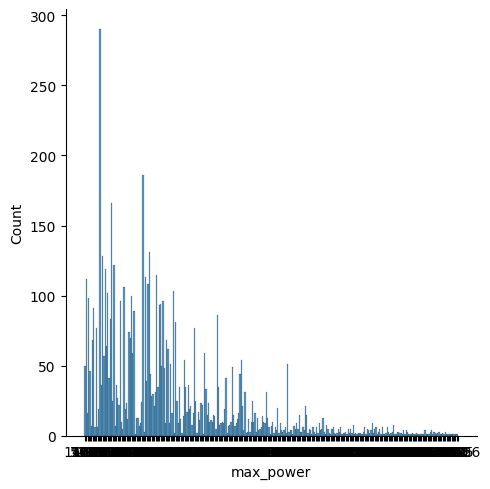

In [54]:
sns.displot(data=X_train,x='max_power')


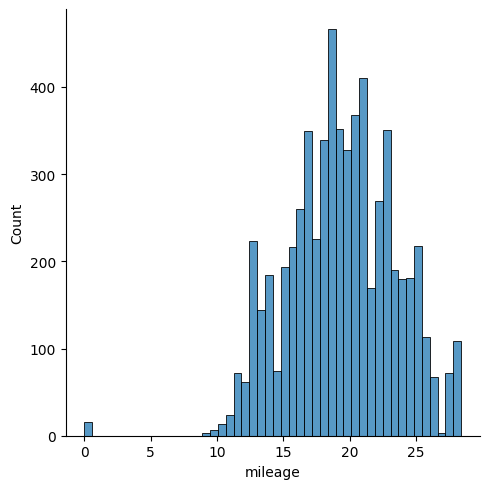

In [55]:
sns.displot(data=X_train,x='mileage')

In [56]:
#filling the missing value for Train data set
"""Converts invalid strings (like 'nan', '', 'unknown') to NaN
Keeps valid numeric strings as numbers
Prevents errors from stopping the conversion"""


X_train['max_power'] = pd.to_numeric(X_train['max_power'], errors='coerce')
X_train['mileage'] = pd.to_numeric(X_train['mileage'], errors='coerce')

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


In [57]:

X_test['max_power'] = pd.to_numeric(X_test['max_power'], errors='coerce')
X_test['mileage'] = pd.to_numeric(X_test['mileage'], errors='coerce')



X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


In [58]:
missing_values_X_train = X_train.isna().sum()
print(missing_values_X_train)

missing_values_X_test= X_test.isna().sum()
print(missing_values_X_test)

max_power    0
mileage      0
fuel         0
brand        0
year         0
km_driven    0
dtype: int64
max_power    0
mileage      0
fuel         0
brand        0
year         0
km_driven    0
dtype: int64


In [59]:
y_test.isna().sum(), y_train.isna().sum()

(np.int64(0), np.int64(0))

## Scaling

In [60]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [61]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 6)
Shape of X_test:  (1606, 6)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## Modeling

In [62]:

import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5001")

os.environ["LOGNAME"] = "Samir"

mlflow.set_experiment(experiment_name="Car_Price_Predication_v2")



<Experiment: artifact_location='/mlruns/756801616543862577', creation_time=1757229263952, experiment_id='756801616543862577', last_update_time=1757229263952, lifecycle_stage='active', name='Car_Price_Predication_v2', tags={}>

In [63]:
from sklearn.model_selection import KFold  

In [64]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




class LinearRegression(object):
    def __init__(self, regularization, 
                 lr=0.001, method='batch', init='xavier', polynomial=True, degree=3,
                 use_momentum=True, momentum=0.5, num_epochs=500, batch_size=50,
                 cv=None, n_splits=3, shuffle=True, random_state=None):

        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.polynomial = polynomial
        self.degree     = degree
        self.init       = init
        self.use_momentum   = use_momentum
        self.momentum   = momentum
        self.prev_step  = 0
        self.regularization = regularization

        # Cross-validation splitter
        if cv is None:
            self.cv = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
        else:
            self.cv = cv

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2(self, ytrue, ypred):
        return 1 - ((ytrue - ypred) ** 2).sum() / ((ytrue - ytrue.mean()) ** 2).sum()
    def avgMse(self):
        return np.sum(np.array(self.kfold_scores))/len(self.kfold_scores)

    def avgr2(self):
        return np.sum(np.array(self.kfold_r2))/len(self.kfold_r2)
    
    def fit(self, X_train, y_train):

        # self.columns = X_train.
        # Store column names first
        if hasattr(X_train, "columns"):
            self.columns = X_train.columns
        else:
            self.columns = [f"x{i}" for i in range(X_train.shape[1])]

        # Convert to numpy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()  # flatten target
        
        # Polynomial expansion if needed
        if self.polynomial:
            X_train = self._transform_features(X_train)
            print("Using Polynomial")
        else:
            print("Using Linear")


        self.kfold_scores = list()

        self.kfold_r2 = []
        
        #reset val loss
        self.val_loss_old = np.inf


        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            #initialize weights using Xavier method
            if self.init == 'xavier':
                #calculate the range for the weights with number of samples
                lower, upper = -(1 / np.sqrt(X_cross_train.shape[1])), 1 / np.sqrt(X_cross_train.shape[1])
                #randomize weights then scale them using lower and upper bounds
                self.theta = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + self.theta * (upper - lower)

            #initialize weights with zero
            elif self.init == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])

            else:
                print("Wrong weights init method. Must be either 'xavier' or 'zero'")
                return
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {
                    "method": self.method,
                    "lr": self.lr,
                    "reg": type(self).__name__
                }
                
                mlflow.log_params(params=params)
        
                for epoch in range(self.num_epochs):                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx].reshape(1, )
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)                    
    
                    yhat_val = self._predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_r2_new = self.r2(y_cross_val, yhat_val)
                        
                        #record dataset
                    mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    mlflow.log_input(mlflow_train_data, context="training")
                    
                    mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    mlflow.log_input(mlflow_val_data, context="validation")
                    
                    # early stopping
                    
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
                
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2.append(val_r2_new)
                print(f"Fold {fold}: MSE {val_loss_new}")
                print(f"Fold {fold}:R2 {val_r2_new}")

    def _transform_features(self, X):
        # Transform input features to include polynomial terms
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        return X_poly
            
                    
    def _train(self, X, y):
        yhat = self._predict(X)
        m    = X.shape[0]    
        if self.regularization:    
            grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        else:
            grad = (1/m) * X.T @(yhat - y)

        if self.use_momentum == True:
            self.prev_step = self.momentum * self.prev_step - self.lr * grad
            self.theta = self.theta + self.prev_step
        else:
            self.theta = self.theta - self.lr * grad

        return self.mse(y, yhat)
    
    def _predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def predict(self, X):
        if self.polynomial == True:
            X = self._transform_features(X)
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]

    def feature_importance(self, width=5, height=10):
        coefs = pd.DataFrame(data=self.theta, columns=['Coefficients'], index=self.columns)
        coefs.plot(kind="barh", figsize=(width, height))
        plt.title("Feature Importance")
        plt.show()

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)

# Define classes for Lasso, Ridge, ElasticNet, and Normal (No Regularization) linear regression
class Lasso(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Ridge(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class ElasticNet(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Normal(LinearRegression):  
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = None  # No regularization
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

In [65]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)


In [67]:
regs = ["Ridge", "Lasso", "ElasticNet"]

# Looping through all regression methods
for reg in regs:
    #Hard quoting other params
    params = {"method": "batch", "l": 0.1, "lr": 0.1,  "polynomial": True, "init" :"xavier", 
    "use_momentum" :True,  "momentum":0.5, "degree":3}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
    
    print("="*5, reg, "="*5)

    #Specifying the type of regression and setting up the model based on it
    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
    #Passing the params 
    model = type_of_regression(**params)
    #Fitting the model
    model.fit(X_train, y_train)
    #Calculating avgMse and r2 for the speicified params
    mse = model.avgMSE()
    r2 = model.avgr2()
    

    #Predicting using the model
    yhat = model.predict(X_train)    
    
    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b6c21a4c927948cea568b5d5272828ce
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/7df07c5b1787400f8c36e9b7523089d9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4b6ca0694b014f60bf87de9c4dc4c534
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:14:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:14:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run method-batch-lr-0.1-reg-Ridge at: http://localhost:5001/#/experiments/756801616543862577/runs/5b269c3375814aef8b35b240538f5821
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Lasso =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/862e12418f384b2a81b7d8a4bf94db03
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/16561fbaa00c4f308c3dc57f3dbad32c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b8d4e40ff96841d993ea127a30092a14
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:15:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:15:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run method-batch-lr-0.1-reg-Lasso at: http://localhost:5001/#/experiments/756801616543862577/runs/8ef891ae77664a14ba86e37114ff24e4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== ElasticNet =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/20ce81897c57492fa992a42146dc05ed
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/26b1896f6a364ebdaff85d4ebf479bba
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f905b52f104947529fd4ea4e1e6ea08a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:15:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:15:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run method-batch-lr-0.1-reg-ElasticNet at: http://localhost:5001/#/experiments/756801616543862577/runs/cc769a811d184331a670d4a714a377f0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [68]:
# Settting up the experiment of polynomial and regularization type all others are hard quoted
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]

for reg in regs:
    for t in ispoly:

        params = {"method": "batch","polynomial": t,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
        "degree":3, "use_momentum" :True,  "momentum":0.5}
        # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
        
        print("="*5, reg, "="*5)

        type_of_regression = str_to_class(reg)   
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        yhat = model.predict(X_train)
        mse = model.avgMSE()
        r2 = model.avgr2()
        

        print("Test MSE: ", mse)
        print("Test R2: ", r2)

        mlflow.log_metric(key="test_mse", value=mse)
        mlflow.log_metric(key="test_r2", value=r2)

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/49ca35c3bc384f64ab65aa61a38241de
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c88a9c2b315d412c82371fdd08e7ea1e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/208345eb40614bd9b5192de8c83fe2bb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:16:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:16:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


===== Ridge =====
Using Linear
Fold 0: MSE 168.48914862186177
Fold 0:R2 -232.57786339798938
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e1da775b9fd34264a4cf1c5e03e65dc1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7440256265061
Fold 1:R2 -243.56477804815145
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/70aa0057a7ca452ab5bcea01000bb1f8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.03696572396257
Fold 2:R2 -244.95229987116133
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/89cd0151b3d740238302497ecc827b6f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  168.75671332411014
Test R2:  -240.36498043910072


2025/09/11 23:16:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:16:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run method-batch-lr-0.1-reg-Ridge at: http://localhost:5001/#/experiments/756801616543862577/runs/e71ef2e325ea46cbad53dad208dcf782
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Lasso =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/cd77fdebffea4748864c0f91ae7fed65
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cfcf7ff08cc14b76ad456b1b317df95f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eba0ab289fa34c779d444ce3249abb2d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:16:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:17:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


===== Lasso =====
Using Linear
Fold 0: MSE 168.9126540133237
Fold 0:R2 -242.5832694617489
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3110393a1265438183ebee8eac984118
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.43542818853186
Fold 1:R2 -245.46013557631906
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9fb7334c0bab49f0b8132862011b56d4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.60851954765005
Fold 2:R2 -234.37711559636728
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/593bc66b7b8447f4b581e880fcf2051c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  168.98553391650185
Test R2:  -240.8068402114784


2025/09/11 23:17:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:17:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run suave-kit-447 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc2fbd35e438432dac3b2f59be42e76f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== ElasticNet =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5cee2c64ed7c4ecfb1aa17dd0b78b9f7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e2953d49cdf447b09187f50f15bb9a22
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/265bed3db6b842e386f2f62438db3209
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:17:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:17:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


===== ElasticNet =====
Using Linear
Fold 0: MSE 169.08856807142504
Fold 0:R2 -229.61265103136148
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7a53ca35e343461d8f3079fa23b7ab1d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8829403192785
Fold 1:R2 -250.65659555026068
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/11e01a40561744bab614630142bcaf3b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.42521178087406
Fold 2:R2 -242.9782427940769
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d4eb3a023a664ad3aaba7ed0edb76a1e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  169.13224005719255
Test R2:  -241.08249645856634


2025/09/11 23:18:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:18:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run gifted-seal-477 at: http://localhost:5001/#/experiments/756801616543862577/runs/6de40da891834de1bb26194d9025dc52
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fc7601db65b94e6490bbfa609871cbca
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e853646ff275498e89d1889819b08c54
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c389cdd022084e26a1c87b73d2d79c0c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:18:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:19:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


===== Normal =====
Using Linear
Fold 0: MSE 169.15569633008332
Fold 0:R2 -245.51168313133695
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/0c38a619245546faa00b33c9b3a4db91
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.61294214228982
Fold 1:R2 -247.91423477917334
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3240b063744d460dba51182181085e88
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.66946486504568
Fold 2:R2 -229.72498442258131
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1465fdd95cf747cb8eba18e4fc7f9835
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  169.1460344458063
Test R2:  -241.0503007776972


2025/09/11 23:19:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:19:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run adaptable-swan-376 at: http://localhost:5001/#/experiments/756801616543862577/runs/3d0abe0860784186a0e57f7ee43034f1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [69]:
reg = "Normal"
ispoly= False
# Only testing with the method here
methods=["mini","batch","sto"]

for method in methods:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
    "degree":3, "use_momentum" :True,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Using Linear
Fold 0: MSE 169.02154407283572
Fold 0:R2 -251.78783084202865
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/241c9259966949d499b8828474295f1d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.3401011491787
Fold 1:R2 -242.214062181818
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a146d78bc626401185ee73e6e580a1a9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 171.69249778949882
Fold 2:R2 -234.7527364883552
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3fddb57e299a4cf29b7e4765cc882b9e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  170.35138100383776
Test R2:  -242.9182098374006


2025/09/11 23:23:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:23:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run abundant-turtle-681 at: http://localhost:5001/#/experiments/756801616543862577/runs/0d2e6aaccd0f42e98269e54be419d9e0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Method:  batch
Using Linear
Fold 0: MSE 169.1368943784315
Fold 0:R2 -228.27899230913832
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f2d3c2a263d24fd8a47a177154811253
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.79205921043308
Fold 1:R2 -244.74465027251318
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a9e107d5be064d299751804e334dc27b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.68736678961787
Fold 2:R2 -249.45667357116434
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b332a90350904dc380a477a7a69020a9
üß™ View experiment at: http://localhost:5001

2025/09/11 23:24:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:24:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run unequaled-sloth-610 at: http://localhost:5001/#/experiments/756801616543862577/runs/2fb845f6337f4714b049f3d2bd5488c5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Method:  sto
Using Linear
Fold 0: MSE 277.4527111204796
Fold 0:R2 -410.2119546991589
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9940a1057f504a5ba7c2a9320aa3d3f3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 29597.437471711743
Fold 1:R2 -41815.77169500581
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/112b18ed004d48e0b757c0f5d5ba1da8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 1306.34561476799
Fold 2:R2 -1821.7263536138737
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8a8e67188af24cfa86851a3abda267f8
üß™ View experiment at: http://localhost:5001/#/exp

2025/09/11 23:32:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:32:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run judicious-gull-491 at: http://localhost:5001/#/experiments/756801616543862577/runs/4ff5ab6d0eef46d0bd828affcab8481e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [70]:
reg = "Normal"
ispoly= False
method="sto"
# Only testing with/without momentum here
momentums =[True, False]

for momentum in momentums:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.01, "init" :"xavier", 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}", nested=True)    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", "Xavier")
    print("Learning Rate: ", "0.1")
    print("="*10)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  sto
Momentum:  True
Inititalization:  Xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 737.8038317348886
Fold 0:R2 -1032.8051172725975
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/861127a000de4de9a89ef345362f148b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 1075.5363711008263
Fold 1:R2 -1574.697599924467
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5ed06094ad3d47dba2a1536e6965dcc4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 4852.344662826258
Fold 2:R2 -6902.807760382133
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e61aed675d344b37aaa21c49a78c73d3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  2221.8949552206577
Test R2:  -3170.1034925263994


2025/09/11 23:40:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:40:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run illustrious-ox-79 at: http://localhost:5001/#/experiments/756801616543862577/runs/92faacde91634c45a836372393110328
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Method:  sto
Momentum:  False
Inititalization:  Xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 240.9906021033665
Fold 0:R2 -347.03369355909695
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c2f53704aff443cb86fb07f972f19dd2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 220.58222255943346
Fold 1:R2 -303.4523707395995
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9c71953e1e014e298174edc0848d4fb0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 279.06467977791146
Fold 2:R2 -408.9710492684049
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/61c69d4536bb438783cd5de

2025/09/11 23:48:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:48:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run casual-auk-812 at: http://localhost:5001/#/experiments/756801616543862577/runs/a30a3aa28c934347865422d79914fe84
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [71]:
reg = "Normal"
ispoly= False
method="mini"
momentum =False
# Only testing diff initialization here
inits=["zero",'xavier']

for init in inits:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", init)
    print("Learning Rate: ", "0.1")
    print("="*10)
    type_of_regression = str_to_class(reg)   
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()
    print("Test MSE: ", mse)
    print("Test R2: ", r2)
    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)
    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  zero
Learning Rate:  0.1
Using Linear
Fold 0: MSE 169.60341436646448
Fold 0:R2 -237.52039595099848
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bb1ef71c5fba43a0b8b6503191853bd6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.27667019130666
Fold 1:R2 -237.47712355276244
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0c1f09db4d014189b23cb4122d1238f7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.39978606370784
Fold 2:R2 -248.30612027501755
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/28cd44c460634cb08631ff139e2daed4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  169.09329020715967
Test R2:  -241.1012132595928


2025/09/11 23:53:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:53:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run burly-grub-457 at: http://localhost:5001/#/experiments/756801616543862577/runs/cfaaed9aff9148a6a58d1598f0b95a5e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 168.76326058140225
Fold 0:R2 -234.93117699733932
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d123003c721d4652b8ea3fb0c13ef85a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.94806572747916
Fold 1:R2 -238.5633705847498
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5a81bcff0c7545dc89e93a1d3d24fbfb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.09314477027723
Fold 2:R2 -248.226464917958
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0cd2a7951c3d488993149444c

2025/09/11 23:58:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:58:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run suave-eel-353 at: http://localhost:5001/#/experiments/756801616543862577/runs/e5759e5b9e7a4c6594e6eeb869bb058f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [72]:
reg = "Normal"
ispoly= False
method="mini"
momentum =False
init='xavier'
# Only testing diff learning rate here
lrs =[0.01,0.001,0.0001] 

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", init)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    

    mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.01
Using Linear
Fold 0: MSE 168.76635491360406
Fold 0:R2 -230.53620100381684
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4184f596927c4add9d76822d4f68b833
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98977086850053
Fold 1:R2 -260.5694580146033
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1b0ae4f1a3794fb1ba6936d4d3b103f9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.23309548371418
Fold 2:R2 -232.94360854905614
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9b7098f4cff3436d99608be60940335e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  168.99640708860628
Test R2:  -241.34975585582546
üèÉ View run method-mini-lr-0.01-reg-Normal-poly-False

In [73]:
regs = ["Ridge", "Lasso", "ElasticNet", "Normal"]
ispoly = [True, False]
lrs = [0.01, 0.001, 0.0001]
methods = ["sto", "mini", "batch"]
inits = ['zero', 'xavier']
use_momentums = [True, False]

for reg in regs:
    print("="*5, reg, "="*5)
    for method in methods:
        print("="*5, method, "="*5)
        for t in ispoly:
            print("Polynomial" if t else "Linear")
            for init in inits:
                print("="*5, init, "="*5)
                for use_momentum in use_momentums:
                    momentum = "Momentum Used" if use_momentum else "Momentum not used"
                    print("="*5, momentum, "="*5)
                    for lr in lrs:
                        print("="*5, lr, "="*5)
                        params = {
                            "method": method,
                            "polynomial": t,
                            "lr": lr,
                            "l": 0.1,
                            "init": init,
                            "degree": 3,
                            "use_momentum": use_momentum,
                            "momentum": 0.5
                        }

                        # Start MLflow run
                        mlflow.start_run(
                            run_name=f"method-{method}-lr-{lr}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", 
                            nested=True
                        )

                        type_of_regression = str_to_class(reg)
                        model = type_of_regression(**params)
                        model.fit(X_train, y_train)
                        yhat = model.predict(X_train)
                        mse = model.avgMSE()
                        r2 = model.avgr2()

                        print("Test MSE: ", mse)
                        print("Test R2: ", r2)

                        # ONLY log metrics and model
                        mlflow.log_metric("test_mse", mse)
                        mlflow.log_metric("test_r2", r2)
                        mlflow.sklearn.log_model(model, "model")

                        mlflow.end_run()


===== Ridge =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f2d49e60b872412286e1bedc8b413f33
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a8b0ec6bbaf4766a96b7e4561915440
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc771f7ebb714ed0a79fe9b55db28d0a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  nan
Test R2:  nan


2025/09/12 00:07:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:07:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:07:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/8615c4068eb84db38f907a928a140fe8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/296051f8ace544e68cc2c9f15121288c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/94eb11f009b04cfaac35b0c3cd354a09
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c40acc8c14d477996ddbc67f120bf0c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf


2025/09/12 00:07:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:07:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:07:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/4dd128143934483bbfca22d5555d0f7d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/34b78fcd632f47b7b925d69c8017c584
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6f1a23d97b89416c8e98f13b1acfd495
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7e8578e057bc46ad9fd3c5fee65aef66
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  in

2025/09/12 00:08:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:08:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:08:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f116419b31184c3db313e7b8c7ae5ee3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e077c40a4ff649c3bbe14327ec9b68df
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/caea6335bab84dcdbd8b9bb9ae4739bd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f534ce2ebf344b19993615b8b1b478b1
üß™ View experiment at: http://localhost:5001/#/experiments/75680

2025/09/12 00:13:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:13:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:13:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3287e550c53d417aa1ec4cc5e734dbb4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/32a7016fe45c48788b85c26a3d870fe5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ca43d729d3384041baf029902cca853b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ac8c5d25d6e8432286c5f1daf4ef1e2c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 00:14:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:14:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:14:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a318bdf333cd468b8011641f6150e856
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1004da6e1e66418289ddedb1089d4880
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9eb92ce3d91f400ab39d76eb4d8c143e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b350091a768c44fe8cb0e78f78ca4e60
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 00:14:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:14:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:14:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/04d4c8ed5daf44599b76de87af4e66c4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bea866773d934801945d46f816a45974
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8075d98dce954fcca14ef5271c213a79
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e8515155da534df6912b38795304a4c5
üß™ View experiment at: http://localhost:5001/

2025/09/12 00:20:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:20:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:20:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/2bb68e77dff14960a2ccabf051693359
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c09fd0a7ec244fa9940379e9e6f9707d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc320beb9c7e495d857945de087a0bba
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6524972f29d742d7b0b3a9a50def0b04
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  in

2025/09/12 00:20:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:20:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:20:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/4dfe9f9037ec46f5857126c5db488616
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5b5972517a8744149bf597caf967974b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d97dce96299142dcbb099a9c8314500a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/60a5c8c023264bf7960a9e83e847aa51
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 00:20:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:21:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:21:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0eeba793cd2345b2abe92acff966f952
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4e0655cc5074487a9040b509e854cab3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e3f7fc7e46ac4ecd85216011e4de1bcc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/53786068386f431aba4fc031c528ae59
üß™ View experiment at: http://localhost:5001/#/experiments/7568

2025/09/12 00:28:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:28:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:28:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a4b3b809405a4ee18277eb8f7dbbb9d0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/19fec40fc7c34c9eb13035670e76d0fc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c5f734a4d06405facbd2396be99f26c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b1af8ce187014797b981eb6e1446729d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 00:29:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:29:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:29:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d645080e77e64b7aa2717449861897cc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/810d396ac2e94d9f98fe2c48b50e6112
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/26454f7080a9445185788f98f8fa76f0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a4a755157be6435e90437f9dfaad84d5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MS

2025/09/12 00:29:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:29:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:29:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/08b0ae34e2504b0d844cea7a7151685d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 190.2960816836549
Fold 0:R2 -271.99351473645163
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1ebee69976604b168ed48af6e55231cd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 182.52487686616792
Fold 1:R2 -261.6216043893362
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5fd54c7c8ebe4531bca53cf900677de2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 176.65554870480562
Fold 2:R2 -248.9039063454519
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543

2025/09/12 00:37:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:38:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:38:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/14f707292991440e9e28fd5bde37de66
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.45767581532985
Fold 0:R2 -237.05420477133592
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ddf1f15c7638444c954de59e584c38e2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.13525152471627
Fold 1:R2 -239.8541094400675
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2ce7e1203e1743ab9151c4bd3e565420
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 172.49746221531439
Fold 2:R2 -253.60626780335954
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7832107e66d64d1e8c99a11ae561be82
üß™ View

2025/09/12 00:44:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:44:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:44:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ddbe3451136a45839749a8e105d2d3ad
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.3886376346459
Fold 0:R2 -242.3536241404245
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c8d400c3f7f4e10bd8ce8b1dcb1461f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.94112863237308
Fold 1:R2 -236.51923065466914
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/63f938c3bc7b441a9f0ffdcbe7dfdfcf
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.71747705900916
Fold 2:R2 -241.4267296865722
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d781e5b80a3c44c7bcb9ab1c5d63b56f
üß™ View

2025/09/12 00:45:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:45:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:45:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e79e30f474cf4e8499ea598bef7a8e4e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 189.6978418512529
Fold 0:R2 -272.67890255987624
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4159298d19254d0a9e1cb5b8f75ce035
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 171.81208624443335
Fold 1:R2 -252.0632495173206
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3a867e9e485342ee9b7e9cd402edd519
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 172.75191859561602
Fold 2:R2 -236.57682177847758
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/25c7f21a27c4

2025/09/12 00:52:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:52:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:52:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9ade9bbed80a4671a5386bdb9a0a56fc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.89974388943875
Fold 0:R2 -234.28263085416887
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1fa7caaf4e3448d2ba44599d438031fd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.88555113673888
Fold 1:R2 -230.80066045268822
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2b48a1cec04b4f9abd82731996725708
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.7410331249473
Fold 2:R2 -259.49613007692795
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/89bbf9bd75ce4be7aba577aaa3a7d673
üß™ 

2025/09/12 00:59:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:59:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:59:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/14b22ddb278e475687b708a8fac801cf
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.01572979873666
Fold 0:R2 -230.96652162935504
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b38d818040a3436fa984fb8abc72461f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.4999659462035
Fold 1:R2 -249.18446997338742
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a54cccc20f764b48b931995b1953125b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80035010596262
Fold 2:R2 -241.5736854593925
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/712612caae194ce498ad06803761c6ee
üß™

2025/09/12 01:00:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:00:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:00:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/aa485accf5cd40ca92306a3b9a4537b8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 171.5094204333616
Fold 0:R2 -248.39963658024527
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/15493ede45314ddcbbcb516ef6dcea17
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 175.87990614339353
Fold 1:R2 -243.60506466657412
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/78ba3364efaa48748821ebbc1cc6ce5b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.74616737928
Fold 2:R2 -245.74687009587913
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/

2025/09/12 01:08:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:08:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:08:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b9ed9859f70649498b5734a018e33ebe
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.48725553245495
Fold 0:R2 -236.40590272942825
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3a490c20f93045539c78969ea5f9693b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.690694190861
Fold 1:R2 -240.84485809735168
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d6b88fd5660a455aa91e6008d0407368
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.0477281464475
Fold 2:R2 -246.309862457349
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e0df7785b0c04ae38d75ab1b4a840d9b
üß™ View e

2025/09/12 01:14:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:14:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:14:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9ab45f664e3b4be9a0d40065ae3acef6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.21056340968752
Fold 0:R2 -242.66049654024093
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4f2f5ae98a1e4cc4a7a74c013d6a9783
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.0500805670658
Fold 1:R2 -245.9535869535788
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8a96bf2928bd4ed8aee897b60b15fbb4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80996359371701
Fold 2:R2 -233.66423049100948
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/476becead94947ce829a05fd2dc59543
üß™ V

2025/09/12 01:15:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:15:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:15:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/dbd453cf868543009973c42a1f905dfb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 177.99782830523958
Fold 0:R2 -253.53987468917413
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9c5ae24151c446d38c77264acf13cdcb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.6971475832947
Fold 1:R2 -236.3949806575053
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6da09f5815204491970b48cf7c69abe1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 172.86908879195474
Fold 2:R2 -253.22069164488772
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eaad8f8a99

2025/09/12 01:23:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:23:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:23:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d52bf09bd8d140038a7208e6ac7369d6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.98134019750918
Fold 0:R2 -234.29663308188134
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9d1708f22665454fa48732be2bb33982
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.10869253440572
Fold 1:R2 -247.8486886584125
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/77e423b02623446e8c3e306097b51e2c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.40030366043106
Fold 2:R2 -242.60521270838458
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ff849979812c4086b7dbba2b32c5ed92
üß

2025/09/12 01:31:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:31:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:31:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/2ea7ce8d6cd2498a95d304f6d856062f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.62297600454215
Fold 0:R2 -228.93660787298123
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e0d5c138253f4d0586e911d820d9bb26
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98378021613692
Fold 1:R2 -254.99224250495556
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/79d1365b43434096995583bf6af1cdbb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.86452873046
Fold 2:R2 -238.31680503411974
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c0c8eb373c444bfaa1b86fe91c272174
üß

2025/09/12 01:31:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:32:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:32:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9921f33b161e4b1081e0dc11a9ceac45
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== mini =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2eaa359854874a0da8cc0d5662c1aabe
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/11ee0ccf8bb042bbb667636bd084f0b5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/17135e75f25f473dacd39675b796aa4b
üß™ View experi

2025/09/12 01:32:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:32:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:32:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9bb4e46a5e3f4e09bb09e826db58efda
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 20569.516420122203
Fold 0:R2 -28867.106414169913
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7d973b778fd046f3b29fe8b956a929df
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8effb87991bd4458991d315a6b32abda
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a5858012dfd148c78fbb3cb6b4aed1ca
üß™ View experiment at: http://localhost:5001/#/experiments/756

2025/09/12 01:34:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:35:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:35:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/26eaec3f6dab450d909c55d1073caeec
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/949d26ba83ae497f811844ca371425a8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f570d8b39ace48b6b32b97ab6962fec0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/18960351dfee4dd9a8b100c0ab4565ed
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  i

2025/09/12 01:35:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:35:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:35:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/10889b00e0aa46278d43d9125d66d53f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d55d13da029a4ae9a2bf2c8c01b3d3df
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/23fa9a0370c644bc8f4629197b031b2b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7bcdd905b74d46edac514b4bf4baed38
üß™ View experiment at: http://localhost:5001/#/experiments/75

2025/09/12 01:36:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:36:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:36:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6ebdf0b44f97489db4e27d24359efaef
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/70570920d306457cbee7d2219048bfca
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/fbbd2ac62e864e25b1fe431b19711f52
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9429a6763b1d49c69d0271afb62c6d4c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 01:37:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:37:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:37:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/5e20f287902b4548a74fd2a8128875e0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/861e5d184038419db4b607d232e7fec9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d3fda65fb7d84d0d811d6bbb96cfa0f1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0ed3ddae5b8b4dedb93bfde85eb70e81
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 01:38:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:38:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:38:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/06ee60ca4fd449c493a1db265185f2a2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/544feb2ce2354e01acc1ae145abb721d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/39afa46baf304654b3c13800ec0dec72
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4ad176d5180345abab691852f33a75b5
üß™ View experiment at: http://localhost:50

2025/09/12 01:38:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:38:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:38:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d17a74b34c6b4fad82403b5db0f64326
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5561655085143c8b8ad3476d13c52bf
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d29cb619bfb742e1a688c17009a1913e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/af8e552cf8d745e895258c4e9c94f13e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  i

2025/09/12 01:38:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:38:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/10beec70be9e43b1aff1b69cc75b249f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a40cadb998664bce802ee168ca25aef7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ce1afb537b57484f8d08153cf5f06b39
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c05b0571db7f44a79f94f24818a226b8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 01:38:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:39:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:39:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/522f4853f9a64c339cc6aa9ec891de57
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e5970468f8a444489a746ab1ce2ccd5f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea8bd107da514be993aa697575dc814c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d4f08c13331745dda75063d789c6e247
üß™ View experiment at: http://localhost:5001/#/experiments/

2025/09/12 01:39:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:39:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:39:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/409b2e3ad9ac4220a45068573d7fd15f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/663445082f6840499000ac37983a6f29
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/00e5fd4e649b46ecaf8811096554119a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c160fa50def45dda597f42ab1d8c941
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 01:40:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:40:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:40:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/06f4c401ef364d02b091e1074d5caa4b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/0736660460d344f1a2c56929ee23bfd2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4d759d89f5e04054bead3c97879c811b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/058ce37d0b384e5890b034e91fdb8204
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 01:41:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:41:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:41:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/88f5385853e3427da56d68b823a180f3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.6775125212247
Fold 0:R2 -236.77940678428814
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e0a40aee2f9441f9a0e50d052bd6001b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.30403899855585
Fold 1:R2 -242.03081190662434
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/70416756c2264f6790f833b5013ded4c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.58335178068546
Fold 2:R2 -242.2281009159054
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165

2025/09/12 01:46:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:46:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:46:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/638c96c4e4f34d5f9496bb656079fed7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.90641288736916
Fold 0:R2 -241.07173411960025
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/dbf25227f2214b128a98204971814c78
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.05125223893882
Fold 1:R2 -235.86515633369925
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f898b928e5bd4ebebf66a2222e914d18
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.61114695692004
Fold 2:R2 -244.20118275471089
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7dc8e3cd02e144119bd5475e65e6c5fc
üß™ Vi

2025/09/12 01:46:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:46:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:46:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/96405e91abdf4cbc801028e2bac1afc9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.7801066407496
Fold 0:R2 -234.65891755216708
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d17cf8fc93ca4f059048a01762d3cd50
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8237292456213
Fold 1:R2 -236.61496029601471
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/373e5135e9324dab8c6aa8eaee2a3707
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.84734943037424
Fold 2:R2 -250.0765222154899
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a6cd1986f71447cca781cf3cd4812a46
üß™ Vie

2025/09/12 01:47:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:47:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:47:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/498340e7da3841218475034011ba806a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.75277231324756
Fold 0:R2 -231.83119836121338
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f42124685d5c4e7eb493ee74cf8390c0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.70048098802212
Fold 1:R2 -242.70800600771378
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e5c13587bdbc4daaa421ab32b5171ff6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.81942314738725
Fold 2:R2 -246.5041883700576
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a46ece8b4

2025/09/12 01:48:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:48:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:48:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ff9470faf99f438d90e0639a081fd0a5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.7254931294261
Fold 0:R2 -251.21893514514437
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fa3fe29f19c6462da21da5b507f63b67
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.5990139022545
Fold 1:R2 -238.65194755483577
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c4243ec3be034b8cb521780c25ace3f3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.97541238215683
Fold 2:R2 -231.80639778122284
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/411933c645924f3b8aaea582bc303e49
üß™ 

2025/09/12 01:48:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:48:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:48:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b14a599e537d4454bb76bd5086a61739
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.40588587172297
Fold 0:R2 -241.7375888796347
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/aa71a0c58cd243649aeea42822c0e840
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.76190997509576
Fold 1:R2 -250.1279591944327
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3b02de6c9c1c49258a6df3f598f3b9fc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.27840648149294
Fold 2:R2 -230.2998562670822
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/729f2d2eb42141f59f8c2c1993114924
üß™

2025/09/12 01:49:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:49:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:49:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b342f9f3e4524acfbbf62798fe635dee
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.12134859202075
Fold 0:R2 -241.18388180785496
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/af708729870e4d67acd5d61628422b1f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.92138401641583
Fold 1:R2 -246.33909841489594
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/35b8d1656cab4e4580d4990d8f05e596
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.8096328209475
Fold 2:R2 -234.64360403624244
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862

2025/09/12 01:50:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:50:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:50:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d2ea7e7b021b458b8a8e11c7c545bce9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.7194603809667
Fold 0:R2 -234.40263992411946
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9418beeca7c145f99d56a3ca11819e95
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.26395211652437
Fold 1:R2 -241.77332648339643
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6394f9f8139e4a77ad34ec3e8950ad87
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.86995165076368
Fold 2:R2 -244.37560266999887
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f44e434c2b254a6f88de3b5fdc4f911f
üß™ V

2025/09/12 01:50:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:51:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:51:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/70cb25935e4041f9a63fc4ff73351733
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.61663044025576
Fold 0:R2 -240.74707982825726
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d339d0d009b449a1a76b63d586358114
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8671152388308
Fold 1:R2 -230.317525758667
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/21187b25727842f08a3dbc3114cd0b68
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.68256984545135
Fold 2:R2 -250.14996845219702
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eada311eb2a04d3396303821b2762b1b
üß™ V

2025/09/12 01:51:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:51:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:51:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c9769df72c35456f9a37acd888069fa5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.97929070134126
Fold 0:R2 -247.49214315545734
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/855c08ecbdbe4e7e8e436556b5d2db0a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8094433377263
Fold 1:R2 -242.7317169608235
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/772498c13620465896465f83bddc98c2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.8638156067403
Fold 2:R2 -232.95513475694077
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec456fc718

2025/09/12 01:52:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:52:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:52:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/849ae3cb4d7d4cadb16f103a5011fe1b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.21444444005843
Fold 0:R2 -244.82093987708544
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c13fe5f250c4c1e985e1be00ed08d77
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.68168499443573
Fold 1:R2 -251.29582885942392
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2748801157fd498ca56a84bb69b842c5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.3692643764201
Fold 2:R2 -227.23198584647878
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f1f3fcf4c5a3489bb4daf50c6445d4a9
ü

2025/09/12 01:53:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:53:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:53:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a4b4cf5ad1d6493297f0f566391687b6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.48202495721094
Fold 0:R2 -236.95864759357673
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/606f8899c6f64fc7a2a46f4485899202
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98639370283317
Fold 1:R2 -242.7228950768401
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/becbc7371e7b4f2bb9ed47e3e24e2a7e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.79468065019742
Fold 2:R2 -241.08794658876434
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e8a16a672d544158a0eefc93fc5933b5


2025/09/12 01:54:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:54:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:54:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/01fb774d8b90446da716b968cab128aa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== batch =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8f449135b004403399c40c9fb1bbdd02
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b79be9905d704e8e96610a63fb662a15
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9f0da3e991d64061b5fa589c0a73411f
üß™ View expe

2025/09/12 01:55:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:55:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:55:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/089198ae005e4188ba1d1e099034f474
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 53038.22596763989
Fold 0:R2 -74645.56223543618
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffb3b8c6ccf644b0b5e99d1a21ec759e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4825b6da2084429f8bc25fdedca1cf81
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5e23383f93044a15bf939ba6f0d57c45
üß™ View experiment at: http://localhost:5001/#/experiments/7568

2025/09/12 01:57:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:58:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:58:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/358c74b21582418c8372d0cdc8809e8e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5751192f713643b585b63d53aa173f17
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/bea642e69b66420db88eaede673cec76
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6391c17a0d44b2ca78b9851bfa3308b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 01:58:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:58:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:58:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9b0ed52ded2b4fa8a2bd4686a6ebe584
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ba8b6db127ae4988b6a98d959c8fc466
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 16201.606623289892
Fold 1:R2 -23331.754855629322
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f93ef860915f4c68977af04daa431f9a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6d85954bfa784c74b1a074dc9cf71091
üß™ View experiment at: http://

2025/09/12 02:01:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:01:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:01:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6e8f3a2153e9440688798917563f04bd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4446dafa09724a76bea5cf030bef3afd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/7fa3b2efe14042dfaf8139405989f690
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/65bfb4f083f24ae9af47eac11ab4efb0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 02:02:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:02:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:02:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6d94f4f7bf024f3d9aabde94d5969574
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c2f7eed43a1e47e2ba2e3d4e25b6e324
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 4537.39134045561
Fold 1:R2 -6766.715646357777
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b8afa9b70849447ebbef25de730a6b50
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ab951a8d2af74f0ab354b870dea74bbb
üß™ View experiment at: http://localhost:5001/#/experiments

2025/09/12 02:04:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:04:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:04:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e13d6f5271d6405f8142c560fc6eb6dc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/29bc230744f14b4f9c30f664a36a77cb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e841fcf28c7f497d8e6d374a471442a4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a4c898e72404e488e2bccaf59823b05
üß™ View experiment at: http://localhost:5

2025/09/12 02:04:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:04:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:04:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/05a80b330ed4487191a5217761cf9a3b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5705170e75a4e7eb1275cbe329cf566
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/64f4adc0897348329c52ab821393d081
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0e7266c64514488dbe9f885c4f504d38
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 02:05:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:05:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:05:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6bef3f75b01a4d23ac012d3bef0907d3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7c0909ac585c40b5928810604e77af41
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5e25f0b868714bfbb8cd39f02a68f5dc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7d7c4c10a7334eb695bedd99ebbfe788
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 02:05:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:06:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:06:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/e67d78c1dcc0443283edc49952c13d02
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE 4.9396792166913133e+76
Fold 0:R2 -7.322247635794724e+76
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bc96d84f7486416a9409ce506aa88c37
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2a145cc4b0704e158a662786c660247a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fba908dfb39f4289a3213b994b1cf34d
üß™ View experiment at

2025/09/12 02:08:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:08:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:08:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/8a77238d82d2480fb7546a42a77f0ea3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9bc9d67d45034eb3987657e43cbfb7c0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5914a0f6f5eb4bccb27943536d5f0d6d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 27241.970975356846
Fold 2:R2 -39163.190469317924
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f0431ebfd0e24de8bce8bfd8fc7acaa2
üß™ View experiment at: http://localhost:5001/#/experime

2025/09/12 02:11:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:11:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:11:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/47569f6215bc40a9af727da44148bd77
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e1f03be5dae244c9b1b656ace59b5ed0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cf3c22ffc6854fcab64063a6f3fbe978
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f7118950d8ca418d8b6297548cb8b341
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test 

2025/09/12 02:13:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:14:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:14:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/94f45493770048bb98f42590565a8347
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.6573385511802
Fold 0:R2 -234.94055356402365
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3fc0252ccf804e5fb399b6a25bcd9559
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.86303553783748
Fold 1:R2 -230.84236430829242
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/aba13ed4cf754ab082ba3da0cc289e56
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.65669248465767
Fold 2:R2 -256.1168066452571
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616

2025/09/12 02:14:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:14:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:14:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/31030e08bad045bba3befe1f4a7a93c4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.27903489593268
Fold 0:R2 -246.33566331989672
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/97f0338f80e74cfcbde06c2e06905327
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.49673681575518
Fold 1:R2 -235.02818319921303
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/101717f12d4640ccb4bc8f7e55fa85f2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.9709347457728
Fold 2:R2 -240.26591553802382
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f05927a97cf94096a11505c69d79c340
üß™ Vi

2025/09/12 02:16:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:16:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:16:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/fbf0b85f73284fb791fbebb0c30461cb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.9841514213179
Fold 0:R2 -239.9522136179921
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4fbff90ce22642948beb68616bb12f0d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98964989188912
Fold 1:R2 -243.51130642210376
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e367a889e64c4d91915d73dee083c650
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.43293255163306
Fold 2:R2 -238.7949359359227
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a035bf5a8f74ef4acf08775da98923a
üß™ Vi

2025/09/12 02:16:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:16:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:16:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7f00d3d5aa01481fbcf3be0f83a9e397
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.13116230560954
Fold 0:R2 -243.24100589977638
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1a501de493e244bf9815afeda6231a30
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.53098935628984
Fold 1:R2 -234.55742347870233
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/51e04c233b2345cb89d500de6d2f36c3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.56198341053872
Fold 2:R2 -243.24167491838907
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0ca6b342

2025/09/12 02:17:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:17:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:17:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ae66d2e532734048a6f786ddd2ce4c17
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.54261593085272
Fold 0:R2 -239.13218051753773
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/326f08f4d67b46d09663e37c7308d876
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.51234920962398
Fold 1:R2 -241.67349211898164
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/bbc40fee8589444d984c6dddfa63e1cb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.34523992047403
Fold 2:R2 -241.65136234169043
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7ebda31c558f4fda8b95a32803faeb68
ü

2025/09/12 02:17:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:17:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:17:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6a7378eaa66c4c0c97d5a6afc1e65be6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.8781350344628
Fold 0:R2 -236.50688293920234
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2acd77ebd56140be943deb03c92eab24
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.43123223438837
Fold 1:R2 -246.60381843287166
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9c345d2389cd402581b4b1376392bf96
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.09796099847213
Fold 2:R2 -239.32254515439695
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6027ce1d87df4fb98c94d8dcfd1ba073


2025/09/12 02:18:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:18:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:18:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/10119910522743e1a316088646c45781
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.80275244092672
Fold 0:R2 -243.17411142775748
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/11bdf99eded94bf68850dde0a00a6499
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.40756679319273
Fold 1:R2 -241.86475062865537
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/82ee2bf242be49b49c4e747936c2c7d9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.32474790672953
Fold 2:R2 -236.45489736918395
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165438

2025/09/12 02:18:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:18:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:18:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/be2af7e7d11548afb3bd6981ba2029cb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.96038942161732
Fold 0:R2 -235.3120579718177
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5c7dc2fc81554dcdb716b84eabbefa87
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.11601357507357
Fold 1:R2 -237.88248552154488
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6e89457105fe47409b7f7745dbcb922c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.3246484305791
Fold 2:R2 -248.4516716173368
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6614462ce50d40238b97ff346b689cde
üß™ Vi

2025/09/12 02:20:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:20:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:20:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/59e74b64fc624be487e6b4866842826a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.15240333875775
Fold 0:R2 -237.01447998694644
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1bda304f771943d1b5582da0f8affc7c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.16001593825993
Fold 1:R2 -240.99503777749212
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/fd7143c4b08e43fe970f70b8cd26f803
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.2552713080562
Fold 2:R2 -244.57538154481844
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8aa46a5aabf943309da54fbf4a37bcf9
üß

2025/09/12 02:20:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:20:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:20:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5ef43234e76a490f8848ff6abf69b8b8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.69846554240578
Fold 0:R2 -241.95484702975924
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c51c4eb71e174d52887667929d9ada2e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.06753957255057
Fold 1:R2 -233.0857226253067
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/17b626f7253d44688df3c4266070b5fa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.465779596052
Fold 2:R2 -246.02790902287535
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8cc91a862

2025/09/12 02:21:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:21:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:21:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/559155aeedc34376a6f677fff791097d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.43887363018194
Fold 0:R2 -235.19644952700358
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/346213ea4f5d4d7986e21da565738743
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.27142015228551
Fold 1:R2 -236.46595266289657
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b66a7b920ac2475faf1e94dbd845fa4d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.03912219533788
Fold 2:R2 -251.69307683161298
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9084220e224a4f43b44076f06c514e8f


2025/09/12 02:24:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:24:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:24:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/cf6ac5f63a8d4ad1905b24fb1f504592
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.1967653204376
Fold 0:R2 -250.13851724050267
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/211cdd78e4ff4da98b57938ac40f03c2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.22634390380597
Fold 1:R2 -239.54234104738921
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e1eabee57f254d7d843270e63841dbae
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.5956221916188
Fold 2:R2 -235.8473798382127
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/db74d9cb862b407fad393046ae90647d


2025/09/12 02:24:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:24:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:24:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/24cd713e576f40edb37646115d54c0f7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Lasso =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a52356be69d04e988dd3f22673c047e0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/078ae47f37af47909e3c1fd157f3535d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/93319bdfe0ba4173a6d014e4c4159584

2025/09/12 02:30:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:30:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:30:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a4f200307b9e4c09b2ebdd04d969c9d5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/524586622f5e4497bd79a2c2c0ae42f5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/abac76ab25fd43c992f507399689843a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/dd1e4ededf6c4fd8997d1258ce826c7c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf


2025/09/12 02:30:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:30:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:30:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/c79a4037bee24dde8d4be382f0da37f8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec972bcd82d44d1f9fbdd97a6944cb26
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/895b6f6035c9499caed27b5f9208caf7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2b8db809ad9348d981d8c07867f747a3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  in

2025/09/12 02:30:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:31:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:31:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9e4242ea786f42de8a8671c6648f16d2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d28bc3b9b52a4d2b98ff4dd819e5b14f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9176e3b2c87d42759aa8c6b2f97ca9c5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4be75526cd8142dbb1768b8a5101a1ad
üß™ View experiment at: http://localhost:5001/#/experiments/756801

2025/09/12 02:39:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:39:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:39:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/27a73e36b6084428ac9f40ee7148eab7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a0d0e2ce8a54a998920acc7f72eef03
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/90deaf393cee408d9bb82f1f36f39282
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/96ad7edd45f646deb93d4e6d9026287d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 02:39:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:39:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:39:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f0b7f5b33c1d4f1098f363997c816576
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7c4b1a4bb33749a69b6eca1550f684d5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f0e42a7cee0541038aafe36fedb48354
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c96c943e3db04530b240d2064a095b17
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 02:40:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:40:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:40:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/78e63e07b54a4b37868df2797426bd08
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9ecad2a5d30941bc99909f4a13c751d1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/101368fdbe524641979349033b8ac11d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/638c4902e8aa499daef27ae0a5dd8308
üß™ View experiment at: http://localhost:5001/

2025/09/12 02:45:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:45:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:45:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1cbf2e4dfff249169084c945ec44fca6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d015bb4f4f8643b3b3fd8cf0c9fe61b1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b8c6a797cabd4cdd9a0d26d9a1555549
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/88e1f043dd524ee0aecaef0bdf6b3055
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  in

2025/09/12 02:46:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:46:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:46:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/55313fce2cd44b65a45fb30a3a55946b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fafaeb4739e6435bbabd659bba776159
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e091caad4bd44b63a5e3842613ce6e3b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b7366422bb7049b6b017edc00aaa6a44
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 02:46:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:46:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:46:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ff2c9727de434724ab883db2a1a2b859
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b2276fafbeb74105a67505784c2f8284
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/96c2ad0a8acb4739819d95c3193776ba
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/908e111bab83432081ece72aef0da932
üß™ View experiment at: http://localhost:5001/#/experiments/756

2025/09/12 02:52:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:52:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:52:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a677a4a9dcf34319a89c5b830735aecd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/48cdc824006c457da0693e7bee8c8d52
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/aa359c6e50a747739b249537503bf5f1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bdd77de28b6845a7a9fd3c1624582e53
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 02:52:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:52:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:52:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f6ee3c448c7347e8a1628aaae769e96d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/702b29f140e7411b9db890acf3cfdc11
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/04ffaee1c16b4201849d00ccf23e2ed2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fef6e4f8302440488a814e6db9ac54bd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MS

2025/09/12 02:52:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:53:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:53:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b0efee020cb94ce59081b9d501e6be61
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 185.905727542163
Fold 0:R2 -271.3285201012659
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/314df922d19945cb999ee71c4dce09d5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 180.44380295763932
Fold 1:R2 -252.66524032530944
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c72497bd9b9d40adaa9a73a573a3ba8b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 180.17665139752796
Fold 2:R2 -254.61208131862088
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543

2025/09/12 03:01:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:01:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:01:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/459d9cd1e4bf4547aee275969c5e3d8d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.30296650921647
Fold 0:R2 -231.37794328295868
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/056ad3951e48474f983d61bf91264a1f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.43160554433717
Fold 1:R2 -248.90641593658205
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec62b2ea9d7d42d888869bf9b3ab3241
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.27034465344082
Fold 2:R2 -243.41996318233174
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a7f3ff8ed4ee45619076e463faab62ab
üß™ Vie

2025/09/12 03:06:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:07:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:07:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f88214fb09594544a26970b3ca4f8256
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.29850507921705
Fold 0:R2 -231.99401376653213
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5f49ad79423446ab92e2020f7e364e36
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.01771597750533
Fold 1:R2 -251.9828902705049
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/52788e60801c4322902affce6ee543bd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.79555796442418
Fold 2:R2 -239.03045248882592
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f74c92404425467eae16d8275fd552ed
üß™ Vi

2025/09/12 03:09:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:09:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:09:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ae58f8fa4f164fe98340806f7cd50443
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 173.510310016298
Fold 0:R2 -257.2877603668201
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b13f24e619094beea621311e67889eef
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.76261348957655
Fold 1:R2 -228.40524004784484
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/900dea796d58459fabb28af1d5e582ae
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.66233841150066
Fold 2:R2 -248.88355131240286
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/abbcaea680204

2025/09/12 03:16:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:16:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:16:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/d4c9fbf42189455792a18fe676caea11
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.0118729170689
Fold 0:R2 -245.05813391172506
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6b131e444b2249e4bba0459683936792
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.74604423669743
Fold 1:R2 -237.98951673780613
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a161b72300b14c1d9d9824d28fb26afd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.47402501863323
Fold 2:R2 -240.9315323806797
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/52e6320d3ed7414db299ce25a4534a6c
üß™ V

2025/09/12 03:20:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:20:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:20:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/070ca832c7d449e2890d969b982fd3e1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.44913531041504
Fold 0:R2 -231.81546596495252
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/89104d2cd6e74fe1a24eedd3c344e853
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.1175211002933
Fold 1:R2 -243.945653188568
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2e2de18514774454958ed45f78720fac
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.86610556840037
Fold 2:R2 -245.55928111290004
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a76ea75eb9344fc69c2808a9d5a70d5e
üß™ 

2025/09/12 03:21:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:21:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:21:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/79045d6262cc48f3a78aaf42393e657e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 192.04763680731511
Fold 0:R2 -282.4256989220211
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2e9020fedda545ea9a8ea3b9c005cbe3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 172.52803903791096
Fold 1:R2 -238.632495230796
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a518bcd5a8447df9b77651c916ca6a6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 184.42917684523727
Fold 2:R2 -262.5327999103433
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/

2025/09/12 03:29:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:29:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:29:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5b6e0d6bbec2416f8e0c0d2190617358
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.21378208861296
Fold 0:R2 -249.78890010224853
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/93930b129efc496d8e1059bd1fd9e768
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.17138578624844
Fold 1:R2 -239.99404271389096
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6f30db5ee76d422d8a3655dd770c03cb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.60028158245612
Fold 2:R2 -233.78137571954156
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eb52241e49894bacab0982cdd15bca4d
üß™ V

2025/09/12 03:35:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:35:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:35:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7886ced255b743b0b51e2e5ec7e1df3a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.67588742074676
Fold 0:R2 -239.43871629992267
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c5ed48cf96ed4cd0a979c2d5a283f017
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7452851502195
Fold 1:R2 -231.2461190489686
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5360171ec294edd96bee6d8ce095abd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.11925694564766
Fold 2:R2 -251.11885105565673
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffd88c21daee46b8a9b588b07d126de9
üß™ V

2025/09/12 03:36:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:37:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:37:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/db6c9e8b97f84717a020702d77dcda7b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 301.39562340507933
Fold 0:R2 -430.05342751144116
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c4e68de8c3d4b16b86801b68bd81af7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.6260056602129
Fold 1:R2 -241.72000183310598
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/64217aa790c84561a32690ff0463f019
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 179.03720257390452
Fold 2:R2 -253.0994456432358
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f5653f5e80

2025/09/12 03:44:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:44:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:44:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a50936d83a9346fa9c700370ba289620
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.91915663599355
Fold 0:R2 -238.17559877484948
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c48af9a1e1a247b49af80953a3316b39
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.11238741829735
Fold 1:R2 -252.19828693311257
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c67b477d913d47be97c0f44b4d6843fe
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.84318277440855
Fold 2:R2 -232.022982429092
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/23fa36fefb99459dbb5d1d1caf29acfe
üß™

2025/09/12 03:51:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:51:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:51:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a4bc0fa444104f628596773d8732fa3c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.6286565962972
Fold 0:R2 -253.6606931202507
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9bd3be67469149919aab634da6ff934a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.51891237145736
Fold 1:R2 -236.6668912865088
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/764ded3b59fe45d687d5c2a412022ab9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.08346524735487
Fold 2:R2 -231.46586877961857
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/77d96732ca0e4c2e8463dd16922adcec
üß

2025/09/12 03:51:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:51:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:51:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/87d98d8f3dd74af5a4391dcbb668cf7b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== mini =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c35f788eae634be78f3feada0c7df5d1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8b424155530a4720acd3b34bca447876
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f834024f314b46c9a2b0294332d9de08
üß™ View experi

2025/09/12 03:52:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:52:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:52:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/5e305395ed934fff89d268adda92781f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/cadadc4ddfb74f40a8564b914848830b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/02c8e08497a540a7bacf39be6e2da642
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/94dfe680de57401cabe915aadc7cee67
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf

2025/09/12 03:52:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:52:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:52:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b3ea80e8fea14ac59b1c97323fa1b130
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3cc468816d9f4a6cbe0fa9af8645fd0d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9bd3b6f7dd034f218130470e67168bee
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/edf3ffdb65c74dafb94db11b45182390
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  i

2025/09/12 03:52:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:52:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:52:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ff92a39cd477451d80ce5a7253e4cdb3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea334e04de034c749b7cdcc8cb7e02dd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6d3beb68a45c45c5b2a024939da50efc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ad8dce102aa645fc96f10f2e10547402
üß™ View experiment at: http://localhost:5001/#/experiments/75

2025/09/12 03:53:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:53:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:53:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a4b6d70915994e18ad3c00811e94a6b4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 15.73198702363001
Fold 0:R2 -20.22302804418838
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c4a6610fd1b54c61966554131ae4339c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c34bcd623ba24ce89859f0ce83f1c76c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d09b6e44dba24414a7eaf488a394e561
üß™ View experiment at: http://localhost:5001/#/experiments/7

2025/09/12 03:55:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:56:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:56:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/188a3b18ed3544bca538b75413e06509
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/55df8ac01a2f465097ff4bb78a08fc56
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/07a2c82a267847c883ca078179f3f370
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/98223e3a663b4b789fff6b2cf732ceee
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 03:56:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:56:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:56:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3f4996363429461fb0b59d9e234ba787
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f4d521f60a71421c8d6bac9cee1889cc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d03bf223e6e54c8ca43d3e2f003cc092
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/116e109008484c5abe946df25c0833f2
üß™ View experiment at: http://localhost:50

2025/09/12 03:57:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:57:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:57:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/4c89d05a74ec4727ad2a0392de3ff5fb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 1.5468066232614404e+251
Fold 0:R2 -2.2444974055452553e+251
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f9939589a8654e7e9df8dee8ac86c308
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a28bb20f03074164b1846964d3151cbd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8ac45ce4f7ce4d9ab82fc1ac34edc7ec
üß™ View experiment at: http://localhost:5001/#/exp

2025/09/12 03:59:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:59:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:59:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/cc332f3d6eb940d98bd7197c20b21da0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/210156e3bf214bf39c78e5cf0b135c73
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0fbb62263d594bc699438841e216a9e6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/98d0c5d8a6fb45009e8cdc0e9548c6c6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 04:00:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:00:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:00:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/70ac789b9ece4fa79a8b6f4c9038e00b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/493693b3edba4713bedc0380a96e38c3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9ea2b174462147ddb3732c5bf6f3daa9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/77d141c1cc704b51b842305b8d1428ea
üß™ View experiment at: http://localhost:5001/#/experiments/

2025/09/12 04:00:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:01:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:01:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c257a3ed9ea545b8aec97b93b2086158
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc52e9b089274273b23c933315494391
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 0.4028504720030772
Fold 1:R2 0.4295448130248074
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/713348772f034a12be6a111b3f5c3fca
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f64fef99157649aca823b331ae1b2e96
üß™ View experiment at: http://localhost:5001/#/experiment

2025/09/12 04:03:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:03:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:03:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/60ff52c906504855af4ce50cfa4c43b4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6604d0f4a4f3413ba48d26c0d820a723
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 7355.696488217771
Fold 1:R2 -10637.79269679057
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/68d44c720f204784a8b69e978d6a3d09
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/35c4a91a83e34f9a9c99930885e1aa6f
üß™ View experiment at: http://localhost:5001/#/experimen

2025/09/12 04:06:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:06:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:06:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5b3bead22a11409696b3b417ab26a715
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.79734277252703
Fold 0:R2 -235.05512305853523
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/47f5f2e9875d48e38ac0f01a178a5102
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.9403389021367
Fold 1:R2 -241.65074117494342
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c08ad6b8aedc4820b526c4146099d2bd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.48763937406252
Fold 2:R2 -244.1149180839692
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165

2025/09/12 04:07:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:07:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:07:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/d5c2a750dd1947dfa6c3b7925e9e8c70
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.7286589985695
Fold 0:R2 -239.49361380457853
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7bc28991bc3743ff900d7d33d7dbec39
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.75999955512435
Fold 1:R2 -250.76401889102806
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/70f1ce16fc5a4055919371b725f81009
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.6444133214065
Fold 2:R2 -230.89864737647625
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/01e9d79153074d8ab7421749acce00e3
üß™ View

2025/09/12 04:07:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:07:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:07:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b76298e9e3dd43bc859f6c39c527f47f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.76482411448401
Fold 0:R2 -229.39307282166595
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/695de57ea5ec4298acf305333b92a868
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.82125456596947
Fold 1:R2 -237.95586771339947
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/64f3a2e8065a417baa4b887a11bfe365
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.69296367447782
Fold 2:R2 -254.52701441401572
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3ee90da12aeb4b668daa139adfffc90d
üß™ 

2025/09/12 04:08:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:08:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:08:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6302a4067aa64b579ec94866cebf83e8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.80747865558942
Fold 0:R2 -239.25119441007678
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/75e5b956a8ae4ef390ace7411db7faca
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.70211207505872
Fold 1:R2 -238.2102980297681
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d6704300181f47b0aecbc6500549b42d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.46280352681757
Fold 2:R2 -242.72092412206203
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bc310e1e15

2025/09/12 04:09:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:09:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:09:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e40bf9b2a78a417aa80e1c4ab033b6a4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.4177246191224
Fold 0:R2 -238.75043212489078
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea0522560cf74a6f9f2a60dc119054b9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.67564292259888
Fold 1:R2 -239.64956375761972
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4291b7006674473ea45ff2d18e6c3948
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.07050686527282
Fold 2:R2 -242.2845376916208
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fa4dec02be454e76a34da92186f8c7d6
üß™ 

2025/09/12 04:10:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:10:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:10:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/22b1898b39ca4b839a9cff6701c04d1f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.88622826447727
Fold 0:R2 -240.89462673813438
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/eb709e1204a64e22b2d319feaa42e3c8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.55585150069447
Fold 1:R2 -247.06983257781297
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6c66fc3509b4186b9cb9fde00e9df1f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.081310733983
Fold 2:R2 -233.57437642029782
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/56eb1815988e440b8d7d4a4a38cf8466
üß

2025/09/12 04:11:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:11:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:11:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/75e7e8fa7ba24d80856daeecc0ebc766
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.95920552016662
Fold 0:R2 -259.3060073439668
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e15df9f19cf8431faacbd83e649c0159
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.64738443613325
Fold 1:R2 -227.3720998092996
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/dddfeef8db0d486ca5624260738b7306
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.32747737817905
Fold 2:R2 -237.55988978662555
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165438625

2025/09/12 04:15:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:15:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:15:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3eb37ec6fb5f4df18bd6c111fe55f020
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.6697797449557
Fold 0:R2 -237.84861895822868
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ed69ae312aaa4d48b0bc0ebfee6d8adc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7114691246669
Fold 1:R2 -236.21348233370503
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/85e7f2b5e3da4105a46fe10ed081984d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.75073131249792
Fold 2:R2 -246.6146117783298
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c0d2b8d9f50348c99a2d4ffdcf25b9cb
üß™ Vie

2025/09/12 04:15:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:15:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:15:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d9dbccf8a7fd4c86a93adfdcab42db0a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.80648817496981
Fold 0:R2 -250.6859057705594
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ae09e91cbc4c4b57872e814c97cbaf0d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8174296019918
Fold 1:R2 -234.34586391809657
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9d86e1322aa84166baa0ae859d3a2be3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.67417549404655
Fold 2:R2 -236.255435981532
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/be7f4a2e58464bcfa8732deec6f4f702
üß™ Vi

2025/09/12 04:16:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:16:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:16:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5f11276510a449e788f1b70d3220503f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.15231267562748
Fold 0:R2 -234.28360038508728
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7022ac86131c4c01ad617638ea3ec7e2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.4567421581846
Fold 1:R2 -241.09705884017242
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d1415ddd61f74a9391d586ae79f238b4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.50470039329736
Fold 2:R2 -245.46581711703357
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7c3b9b68

2025/09/12 04:18:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:18:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:18:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1e628cad5d604caaa85fb365507ea8f4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.79647203670538
Fold 0:R2 -244.8272971074721
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/de095a6d71384825ad46f9ba8225a01e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7733398527849
Fold 1:R2 -234.5754103550974
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/fa70545fdc124310993abf98844d48a9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.13996237951318
Fold 2:R2 -242.19277428665075
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a82a3fb9da3143a58adf2fdfb47efb3a
üß™

2025/09/12 04:18:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:18:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:18:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/755e38cad10f4e54a5bd39ee0da2c526
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.05338480088128
Fold 0:R2 -232.5014264965108
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a6fcc0f440e46b98f3eac6c34c4d8c7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.0095400608026
Fold 1:R2 -243.20455651510582
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ed0ea4a7b73e42d19408bafd6cc3b078
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.7563270312243
Fold 2:R2 -246.09538332584268
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7d54831e2b4a419cb4b976b046e10a8c
ü

2025/09/12 04:19:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:19:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:19:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/04329924686a45a0bb0a3a52b83c5845
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== batch =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4c85dc1d67934e519387492462fd7fb0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/abab4a5c898f4f74b98d3170dfc41f00
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1bdd313b90994938844a2f9778409242
üß™ View expe

2025/09/12 04:20:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:20:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:20:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/dc78386b816440d58f21993f9804329c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f09d5f81bc374cbb90d1f0b2d211f2fb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/67208a0f68f24a1a9b1db49ecb4e32ca
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ce0f2a4738b445258bd2f0c5b4b8d416
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  in

2025/09/12 04:20:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:20:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:20:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7fc60b894f5a4b16b757b6c04aa97f3c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/447962f311024209895fb32d639e348a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3f4984b7341c4f458f98db3b9dcedfa7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b9332f023f924d0eb58852b059de4911
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 04:22:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:22:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:22:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e0751160d8e74e11b09bed5a842fe5ea
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6be57be37a5944d39e35c634206ae78c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/7e2386c780fe423f98fe14ee7af3e8f0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b1317eb1f65748f784f23b96ebb04469
üß™ View experiment at: http://localhost:5001/#/experiments/7

2025/09/12 04:23:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:23:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:23:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/415bfd27f85c4aea928b6791e8314a8c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 25178.467160415305
Fold 0:R2 -35154.695014291894
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec98f24e24864074956100239f1f2c65
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f88f5ca6bd71465587a9291caba0223e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/dab4ef56254b4f11bdc6f9fdb2a1ecaa
üß™ View experiment at: http://localhost:5001/#/experiment

2025/09/12 04:26:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:26:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:26:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/380b2e734cca404487cc9e27bbf7bf3f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/af90b4b66aea4cae955fd2fd2113d816
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5f2656041424809ba2cd16d142674c4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/08b2da3e59fa418f9d4fba2a2b6066f2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MS

2025/09/12 04:28:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:28:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:28:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b291ac16b4ef4a53a7022347822ed51a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bc0747e3ebe94323a59b2968763e47a5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d4cd9a6cca864daf9dab49a7b2d86481
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c456f808da4c4a6bb423f0b66be4c3ac
üß™ View experiment at: http://localhost:5

2025/09/12 04:29:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:29:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:29:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b7fccd6a2288439982f38c3014331682
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1b7b325eb4ba41b3921673a34144a26d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d953301796c34affb8a7e5c0d7bb3db8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bf46887d826b42c486b021e4759b5d1f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 04:29:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:29:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:29:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/bd2abfbede7747898c704a52c96e6a50
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2ad7296bc5964929843f98abbc815b1f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/84da1a8ed86148c3aebb3c908b957a31
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d0bb0e9bff9d4f318ca93e05ef5ba668
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 04:30:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:30:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:30:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6f142bad162043cab733b9abf54c4a01
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d0f60af059a44805a6af3e1647af5b40
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3f67f32205704ad3b876801b03e18b7f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f0c4ff86a95649f5b5a049d4db8473b4
üß™ View experiment at: http://localhost:5001/#/experiments

2025/09/12 04:31:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:31:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:31:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c222bfab682e4686acd92191692f2999
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1ccda923a3f64ae6988f711576f8fa03
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0d3c1011e41147548e1c20306a6192fa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2a93c9b78c85455f90ac87bbe8431ca4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MS

2025/09/12 04:32:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:32:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:32:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/90ff56ec1d844a819ae15f054f22a8ca
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 4236.128590846121
Fold 0:R2 -6084.363209288455
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c0977eb7e295476181b0b651d4a7a997
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/78234826a66b46a789ed2167a6144920
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9676f709af63415bab31935ff1b36161
üß™ View experiment at: http://localhost:5001/#/experime

2025/09/12 04:35:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:35:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:35:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9ced6bcda6d7419999544a50083cb754
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.7162001236404
Fold 0:R2 -243.8094888348029
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3bc2912f840e467790aa3cbe1a99c7fb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.62648013171057
Fold 1:R2 -230.38192946669622
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e181e8f4a43946998ac8aed577169c49
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.74933717746052
Fold 2:R2 -246.7514855902792
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165

2025/09/12 04:36:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:36:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:36:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/138608e7ec104b1a9ac79885b72445d6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.9441149899869
Fold 0:R2 -246.40596951341172
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2d2fea0856e643f28815386d8722efff
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.40417127023656
Fold 1:R2 -235.97782807599143
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/38b40ee880954130aff087b040f60fd6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.65973286239452
Fold 2:R2 -239.61453478545775
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d112b19b78bf4001a5ecf5b32e93d515
üß™ Vi

2025/09/12 04:37:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:37:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:37:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/c3481bf209fb4a6c884e17055d730386
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.39611754506342
Fold 0:R2 -240.93535578785333
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/46bdadf493b743adbc1935fc0f5f35ad
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.83144245636814
Fold 1:R2 -238.58228222951962
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2b92e8fd2da548d398553fdab4e5359f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.17934090423725
Fold 2:R2 -242.73935039492554
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a4ae8da392b24b0ab96d279e078f9092
üß™

2025/09/12 04:38:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:38:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:38:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7dd040d9c56b417ca606649004d15e5c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.82911419922524
Fold 0:R2 -249.57689828131274
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bda823fe4a5e4f35bfaabc36fa4b7360
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98184898999432
Fold 1:R2 -231.54744894434842
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1c36bb19194e431a808813a576e2eaee
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.77637378148373
Fold 2:R2 -240.53111875279484
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eebcb41d

2025/09/12 04:38:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:39:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:39:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/5aecb169536a466b9d53050f6d341c99
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.60858273407803
Fold 0:R2 -234.66922877629463
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/89477c17087548ea9929a9b055a35512
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.57149507424438
Fold 1:R2 -242.02666150376191
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4cc5414574aa4ccfa7ea58f9c5737591
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.22115996185255
Fold 2:R2 -246.0038623683472
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f7fe0dc076a1427c9b5ff81fc2128574
üß

2025/09/12 04:39:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:39:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:39:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/174c7a65322447e798fdd8e6578b5823
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.2007381461808
Fold 0:R2 -245.3620994054752
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/98b2166987fe4f5881f0efaa2e5da856
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.3042446142472
Fold 1:R2 -236.12518370556666
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f6311bc3f956421096dbbfc9bdb439ec
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.90239897264127
Fold 2:R2 -240.87621975179135
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/18fd837c105847d28e6f3763aa45ff6e
üß

2025/09/12 04:39:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:39:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:39:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7372182d1a70431d8b82059b936de1f0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.66496314980634
Fold 0:R2 -244.16116579681892
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/81c1987f28e14867b9fa0287c935edd3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.63909900169023
Fold 1:R2 -238.40731784960929
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e7316e7b15e242d7aecc916d144e9b2c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.79233467998765
Fold 2:R2 -237.935654353562
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862

2025/09/12 04:40:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:40:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:40:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f17109981c5a4274a92656232b6b4cfb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.98655334349127
Fold 0:R2 -239.47058242731623
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9559c332891048aab8177b5fe1c1ff21
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.17854714562503
Fold 1:R2 -242.77595003510112
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b37178e407e94ea89c8622060e72ecb3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.081173069699
Fold 2:R2 -239.7723784470282
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d9d64d28d5b049deb3087bd09cd52791
üß™ Vi

2025/09/12 04:42:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:42:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:42:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b650246952d644099e2e49006a87ccc7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.85489462510554
Fold 0:R2 -244.66699579763974
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4ed35c1aba764f0098c831de2e0b306f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.3083626062148
Fold 1:R2 -233.3686686412215
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c2f57d7baa94c998efe54ca49d81528
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.9475566938204
Fold 2:R2 -247.05175717504252
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/77682afd20d345a4b5211330efe06fd6
üß™ 

2025/09/12 04:42:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:42:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:42:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0b31a96f29b54e96844410ff879e912a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.58676304707595
Fold 0:R2 -239.6457193738959
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/df6decaf79c54a249850ad9300bbaf11
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.99642245013519
Fold 1:R2 -237.40867435579145
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2bc5467d49c64f1da9b84e1ca2d66dfe
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.50183244631222
Fold 2:R2 -244.89665331879107
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3a25e0b

2025/09/12 04:43:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:44:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:44:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/fe21c68bb2e3447aa18177e73de03da7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.7890867473445
Fold 0:R2 -230.99791952078488
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/10475c3d9303431a9dd3c97e20829cd3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.17308588414346
Fold 1:R2 -257.7765253934719
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc8e5e30c07642558d954fe589d197b6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.3634832809727
Fold 2:R2 -235.07139220547344
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a462f5deb76348a6992c4af5c5f5bd62
üß

2025/09/12 04:44:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:44:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:44:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/601f9addf0a34a9daad6a024b0d1f47b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.38693099578498
Fold 0:R2 -236.46438092261837
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/26d3809adeab46f698927c666c2e21de
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.06823260571332
Fold 1:R2 -239.8043668921197
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e1a1dc5dcc7e4e269da752942ae06683
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.53992324631668
Fold 2:R2 -249.06816513046653
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/959b7aa2c3d84eeea0ffae3666546e5e

2025/09/12 04:44:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:44:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:44:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ac9c806ea6ad42c28b7d6fc8472ce07c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== ElasticNet =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/632eeaa7afeb4206a546e206abd8e8f7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/43208825bfa84a728676781d7711d062
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/37504f93b7ab40ed9016592a2b7

2025/09/12 04:50:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:50:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:50:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/1bd5b2279afd4e0c9aa7f95d1a87d5ff
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/988bcf98c2cc4855ac33219b739fba5f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/63a4bd36d15f4148916d85bad280fc48
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2bbb29a5a0444d77becaa07e3040b11d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 04:50:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:51:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:51:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/074021f7a77e474d92bbad365d61a1fa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6b3ec387774c4d06a5333a2288bbdc06
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8ac1b60084b7453b8a3782bc037e1e64
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec7407cf225c4f0fb1ee1ece99cfbff1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 04:52:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:52:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:52:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/d3b1b8785a7f4e99bd3a749c8be09cc5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e3952ed575524cb3bfad6e5513bfc724
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4d7d12bdcca446ff9daee16c8206dec7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f1020130bcc8498ebec04ea3ad1ab376
üß™ View experiment at: http://localhost:5001/#/experiments/7

2025/09/12 05:00:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:00:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:00:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/546f390a954545ea9e7322de6dada3b5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b9164410168d4748a289d30cc781ec8b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a87cb8b91b1c4a4b819b8f1b5f29585d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c77a13464a74c5a9422b1af417a742c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 05:01:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:01:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:01:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3445fa2d9a0f4062a10961ae61d71954
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/258e8d4aa0234bc9b5ab45a42edd6461
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c965bd1ae5804b91a32f03ad4aef88bb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/cefaaecced4540518e956b9493ac9396
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 05:02:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:02:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:02:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/c13deff93611482582a62103826ce963
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a822c6f6b6f8466a9e930ac0295703a1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/682185b062094db992b93bdd856dfa34
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0b1410ab089040b0bb3db76c1dbc09f4
üß™ View experiment at: http://localhost:

2025/09/12 05:08:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:08:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:08:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6ae51cd3cc6a487fb7b93aa59f24df37
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e400c24da60944b6a0a66b91b317cbd3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/be6e9f8f0aaf48429b2529de3a70acd9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/09befeb7745c45b683ea48db9a9b7f41
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 05:08:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:08:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:08:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f143fccf60794fe790c1ab5cf6e19e31
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1dc9b818da874ca7a957f7afebd70415
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/64f334ef78a64f4eacf1452d6842a580
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b795f6fed1e84b8d8dfa64dccab86ef9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 05:08:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:08:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:08:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0ee81885a59843e18acd9411a00b1426
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1cab8cea04f74732906eb0eed2c6eb1f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d19f1d35251f4777ae6a66a252a38aaf
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c736a5c57a7e4da38d9955ba6af7c982
üß™ View experiment at: http://localhost:5001/#/experiments

2025/09/12 05:17:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:17:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:17:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1db3b14d9192447c8f6be084d57758e1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2fe5219fcbca40bf823c6959352c3cfe
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/eb9b998ba895447788595b7f44401eb6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/81fb1804c4d74a9bb16a5453ee78d1df
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 05:17:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:17:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:17:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/47d21ddedd2743c0a8f1fce97367dcac
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c393cfcbedf04b37a0ba37b6a4885924
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/24ab12347c3d4650a5ddff6ebd12959f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6dea148e5c2d459096af8a0cd36e58e5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Te

2025/09/12 05:18:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:18:25 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:18:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/88d5b6f8b418469ca6e0ecd024acaab7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 184.89157983579653
Fold 0:R2 -280.7780982013615
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8ff24de09dd14570a3ae3dff2cb4cb13
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 180.44617011368686
Fold 1:R2 -245.07367279242865
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/424dd2fbcab844739b82e7fa5a1dc3c7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 179.0797887666369
Fold 2:R2 -251.46285107401434
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801

2025/09/12 05:26:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:26:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:26:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/af89e1de27714829af30d023f67fd77d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.36815795731297
Fold 0:R2 -243.96091085276572
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c46b5a4da91b491386ca3c015dd51c1b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.58017415401932
Fold 1:R2 -245.5083605471843
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8bebf6db70b04d2c8942217672c60c6c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 171.11357450806716
Fold 2:R2 -236.9806485880651
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a8b0c57e284c4acb9eb759bca07f96da
üß™ 

2025/09/12 05:30:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:30:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:30:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/954755a16fc941b1966b2dcb51abe161
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.543508561144
Fold 0:R2 -241.67932945695026
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9f9fc77ede2b4df59c31291eaad439ee
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.83706378955938
Fold 1:R2 -237.64170247641223
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/34554a4e74d34119a7a2f27b53266f54
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.35043173324001
Fold 2:R2 -242.4909792441898
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8aecc510341e48ee8b77b33aa7393ea0
üß™

2025/09/12 05:31:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:31:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:31:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/353e0729a3bb40e1ad25dd2e998388d9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 171.60414272853052
Fold 0:R2 -247.9822750599482
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7c5e1f0872d042cab94dada28816de38
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 172.07520496570018
Fold 1:R2 -239.67032896787634
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c268e9a348244ca198429bf2b9d20fd8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 173.61919627054274
Fold 2:R2 -248.8213382431746
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f23272d

2025/09/12 05:36:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:37:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:37:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/123da4b1fc804a7693fef30f5f453c56
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.82648101454748
Fold 0:R2 -237.5612617751824
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a61c812965949bab4b9e23e65ade78b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.57906503378405
Fold 1:R2 -247.43389606933115
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1b5744d789ea47409043b16846a561b6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.45251322638265
Fold 2:R2 -238.34304613679672
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/dff6e08f3d7c4f30b4127a42ec9ea876


2025/09/12 05:40:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:41:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:41:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/1543f740905e45aa985aaec7c4878f94
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.5554866033365
Fold 0:R2 -235.50742582945702
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4c24d6d4d7f04f038b3198d3ccddebf0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.83244499316893
Fold 1:R2 -249.3990757179705
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c4240c0242af439c92516e08b729aa94
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.52587743448242
Fold 2:R2 -235.77391562204957
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/73d21064534047879a4a5ac31b59332f

2025/09/12 05:41:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:41:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:41:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/366d613d3aba427790898434f3c5a856
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 170.93234200964406
Fold 0:R2 -243.10313669095515
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d66f07667f6b418295fc1ac618e0da56
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 179.09913191991453
Fold 1:R2 -244.53063836632955
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a0af3b7f42b347639364787b07fdf1e2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 182.67532019268708
Fold 2:R2 -271.90612700233044
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165

2025/09/12 05:48:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:48:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:48:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/30916d5d669f484487311867445357e3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.5292703794376
Fold 0:R2 -243.20829596281956
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c77c9f40152a4489a7d96d71d98738e7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.25690628919997
Fold 1:R2 -226.0498759046316
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1cf7a9e38e32410bb8b04dd8ccefa1fd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.14335281896555
Fold 2:R2 -255.49965756789555
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/41b846f1ceec4cc29ff3adc0e9107d5d
üß

2025/09/12 05:51:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:51:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:51:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7d68beb7e1f64eab89d9104b19e4ac9e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.4904039006478
Fold 0:R2 -231.8233062816286
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/95cb1f8a8e17429da312bee752a7c360
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.81026857171923
Fold 1:R2 -241.49798903144477
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/86c5f18ebcd6465c94949a240504c612
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.642303462026
Fold 2:R2 -247.2453139240299
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ee1a1c8b1d9348b0824390fe3b741323
üß™

2025/09/12 05:52:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:52:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:52:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d9793367ed7346b2ba18ff72c774c976
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 171.19139653317544
Fold 0:R2 -236.37294356522264
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c3691c3b1e0e403aa4c8a2c581fa88e4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 172.61854335841164
Fold 1:R2 -243.92427618893538
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/068682095bc3414293cf2b97f29d7894
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 173.3806337615462
Fold 2:R2 -256.9380382378149
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e928b

2025/09/12 06:00:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:00:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:00:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/79f33508cd164ba694a466c3979f1282
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.71872621469223
Fold 0:R2 -237.8086370532288
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6312a5d8e7fc405db4e86052ed3d4efb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.37018056806986
Fold 1:R2 -232.60516708667598
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d54fb72dcf5a4318b6898729a7a3e60f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.44582018960662
Fold 2:R2 -252.86032848674907
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/39e1f0745c9144f4a2bbf8f6d63b4af

2025/09/12 06:07:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:07:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:07:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/46652c0978d242908acb3feca47fff43
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.85380838310905
Fold 0:R2 -230.27142748462924
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/92407a0db152478da1bf6bef926b6873
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.96051434978094
Fold 1:R2 -240.4404653615173
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d47817d1a73d43e2b5cf5975745e33a7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.53583179522204
Fold 2:R2 -250.96281046123735
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6413bf2786ed4815826e02358bb49

2025/09/12 06:07:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:07:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:07:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7543f4d0b74d4047b95992ddf1e466ff
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== mini =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f6d60b691cc743969849a933bc33e8e6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/28011497fbf2470ca6e0e57b9733306d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c82e16a4c20a40bcb04d7f49a3f19e45
üß™ View e

2025/09/12 06:08:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:08:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:08:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e1d76cd277d644f58bbe3d4ec3d53870
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3a27594a6ebf4be2bded596e478e8c9b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f561a560a7b94b5b85b9684a1fca51a1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5052d7923f124893871e5183a79dbba8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 06:08:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:08:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:08:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/95de471ac19b48aa9355e679331ff067
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 4254.678467742112
Fold 0:R2 -6127.629787049112
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4e3b7d8182b64b7e92b595b2c5368229
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b481e3e9398b467aba0bd48035449419
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/167fb68ad42e4e0e869ffe95a38b63ba
üß™ View experiment at: http://localhost:5001/#/experiment

2025/09/12 06:11:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:11:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:11:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/30dd966e50ad4f43a98ebc8734d9d021
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/cea84e18f4a84b85a7c66cef7fc6803a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2930aa1276344d72a5f86ee230aabb61
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1157b9d3d22a4927aa237f1415702727
üß™ View experiment at: http://localhost:5001/#/experimen

2025/09/12 06:11:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:11:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:11:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/2c0ca940531f48d4bcae853698419bb2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8377ae2ce5ce4316a81a013998238f94
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/20d9da4d50e542f981a65aaa906735f0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6ce8454f6e97458db300094472522dca
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test 

2025/09/12 06:12:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:12:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:12:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9adc7897372d457dbfbd1b21d22e291f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 22485.553891648295
Fold 0:R2 -31995.25344532612
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a388344901b243b58bff2b1403ac9239
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b6e360701e344839bbd3f7bb36d74ccc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4537519d7852463c8449565ebc5c485a
üß™ View experiment at: http://localhost:5001/#/exper

2025/09/12 06:15:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:15:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:15:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/17a10e5c404e47479b2f793c9e695d76
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/030929f2b8354f0a87a7174cae8d76b2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/228e588221a04db19570b07df42ff6e9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/231427a9a5644075a68f03fd7ebbfa3a
üß™ View experiment at: http://localho

2025/09/12 06:15:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:15:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:15:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ea7bc82d27294ffd9889892ffe294469
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/dd52fb06f44c4717a51333282bdd8f67
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c6f5571a283a4b218e86a02b9942c629
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1cc0d0f3f2bd423da18d5cd47475059b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MS

2025/09/12 06:16:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:16:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:16:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/05ad150a53e64666bc3eb3ff5d3aeefb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2d017d798ef7467abfd25ec27c6f6cab
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d2350426a6334ba3be5de8d59b935a38
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/22cc0b561e944e5d89daaaaba9f3a3c7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test 

2025/09/12 06:16:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:17:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:17:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/00320ba249a34316a0877ce3dea5f203
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/67c1578b0602403894c43a0f7c9fa806
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8cf4849ce42d463f969cfb63ddb407a2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3ee0c933d6bd4b709db791506a3e72a3
üß™ View experiment at: http://localhost:5001/#/experim

2025/09/12 06:17:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:17:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:17:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ce8ee6f80d134feeab15e394d65c8b41
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5041d8d3474e4322bf85b4c79416127d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/511fb97163684294982bc3a29b28c5c1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2d88738866a64deeb15dc97f85b06f81
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Tes

2025/09/12 06:18:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:18:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:18:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c338ee69aae2448b9cd8b4f7f7f0f679
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2ed7d1f6f03f47729b94ee3df6f22f11
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d7f964c0811442dd80b4fe645edfa1e6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5a8dfc1d5304b779a21d207b10e836d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
T

2025/09/12 06:19:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:19:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:19:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/22853d06cffa49b5ba611fdee5c8ffb3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.04674625408722
Fold 0:R2 -234.1263697972426
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8711b1e2d23948bf90b7513a697f91bc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.839639551529
Fold 1:R2 -241.34051590307772
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2042a24c1a8644a1a796f2d5f136cd25
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.1160494849927
Fold 2:R2 -246.53005988887486
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016

2025/09/12 06:21:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:21:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:21:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/af8c90919d76478382069d5cf63257fa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.46995489590282
Fold 0:R2 -241.58579407568465
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5b432f54db7a4825991b01bd6bd5fff4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.71428657249325
Fold 1:R2 -227.21533304397227
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6e7ae31b9ae4aef8997eba726a2794c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.74451709800596
Fold 2:R2 -252.6208696634677
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4e2bd858dacf47249050efc51c119172
üß

2025/09/12 06:21:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:21:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:21:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/dfede517405847b78d212add5c7ff4e5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.7145780366764
Fold 0:R2 -231.95669957882
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/57c406ecd155498abcc1ad81170a058c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.53803629902202
Fold 1:R2 -245.94570144191212
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4a0180f5ced649b589c98095ce85c96a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.706934736898
Fold 2:R2 -242.6574525773253
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/94f9d83baf0f404485211e6b9b1536d0
üß™ Vi

2025/09/12 06:22:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:23:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:23:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/afaf033300874a7f91b4eab6d4105f41
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.39479555780792
Fold 0:R2 -231.61564903380892
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/daf3fd00aa674050b6dd7a022022635e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8278120778628
Fold 1:R2 -238.90882646709323
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0b71e55cbec4438fa78c23611bc4dea1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.69181887357013
Fold 2:R2 -251.87285448363144
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/222c4

2025/09/12 06:23:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:23:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:23:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b907d58228f2498caaa0a92acde43df9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.52085007045173
Fold 0:R2 -232.736855527264
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2ad07b7e8fe84f0190d50d46c76a6481
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.0721423503031
Fold 1:R2 -239.75123257354423
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e4a06d667dc4417fa82122a5d95eb91b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.76770098763137
Fold 2:R2 -248.6801815084937
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b5a6036c9bc94680b3d8fb6c2fce71f0
ü

2025/09/12 06:24:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:24:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:24:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ef75229434624135b4133d5731c3c518
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.5582364149207
Fold 0:R2 -242.98695661112222
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fb2e873f75224b0987c1bbb08c2d25b2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.44948046775994
Fold 1:R2 -226.4575474893797
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e36086370c3b44ffb6e0033acc74158a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.49968686607403
Fold 2:R2 -253.73612368747766
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a084ab0cbf744618b5b35fb8696d64

2025/09/12 06:25:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:25:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:25:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/523e371e40ab4a25af127330efbb5d74
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.87298680719155
Fold 0:R2 -249.13621851368336
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6cab92c649134e14a652b88da07f4ac2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.03547570859422
Fold 1:R2 -244.45096530056207
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec04d5e02ace4d378235bd8e06bdd3f2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.13357385403435
Fold 2:R2 -229.11931721049606
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616

2025/09/12 06:26:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:26:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:26:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d99a28948ae64bd199fc585dc0e7a42d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.64377106976724
Fold 0:R2 -240.83784806646372
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/047137751f934970aa0a1a6367970705
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7841370259405
Fold 1:R2 -230.83612254185934
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e4ded5ccbf56480391844e16e29e195c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.89984314968356
Fold 2:R2 -249.72600980180965
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f755a5f73def4b888e06fd89750af49b


2025/09/12 06:26:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:27:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:27:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/28d71cf759834806becbb0487e5803de
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.78423300154913
Fold 0:R2 -250.45191382254103
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f6c54c5d1e1945deaf787e6111ac8caf
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.83323271633287
Fold 1:R2 -232.78141385063398
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a9c6135ae05a4f9b9821de9853667831
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.71177011733977
Fold 2:R2 -238.0481558189949
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a30ab64c16fe479ba1d11f5eaec2c2e1

2025/09/12 06:28:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:28:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:28:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f41fd4a02cb4415d9b3fa1a51f229a9c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.5003378303939
Fold 0:R2 -254.93538916296407
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/89eb2ffcf3b047518125f60977aeece1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.80962421938662
Fold 1:R2 -231.79611444927778
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a7ed932ad3a4378b0043502bbb39bfe
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.69488400467753
Fold 2:R2 -234.79806736983716
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/88d

2025/09/12 06:28:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:28:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:28:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/39b428cc7aa241fa865fac4a76a8f73f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.65933688505027
Fold 0:R2 -256.0613467589683
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c4a0ff51759c4a8d833b559c6ae337e1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.73199839948373
Fold 1:R2 -243.76280895914638
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6bd98d1985943189a650ed1a0262faa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.91083157611865
Fold 2:R2 -223.28741983489647
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/083d2ec4206447d2bc9ff060acf054

2025/09/12 06:29:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:29:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:29:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3ae4a3f73169421ea917958be4bb983a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.55483382702693
Fold 0:R2 -248.63052961034572
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f4111742b2424cbb911e53bafe7cbfeb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.76799516515507
Fold 1:R2 -222.60972096133852
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5b8b012ca7974c839b4c6a0ccd586f2e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.09067532056528
Fold 2:R2 -251.95049229268295
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7d4a877c5c924d47bde640e6547

2025/09/12 06:30:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:30:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:30:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/42ef0cc7f755457da8cb2ea636a3e2dc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== batch =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c3261ba0dcd24276a91ccf11ddd4c6b0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/213ef84e10ef4c70bf30b6f859e85206
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3c6595089bd14af8b4c9d0ec45be730b
üß™ View

2025/09/12 06:30:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:31:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:31:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/78ae8aef3b2c4fb99dc405b9e9d1f4ef
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/73bc4a4601da4ef2b5b1497d6beaf347
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/78b7c591386f4ab9865ae52fcf1e6030
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f5aa9f456527428b9cae44e0c8bdc4b4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 06:31:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:31:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:31:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/19c9796ad71b4007b2d04d77c8ed44de
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1864fa2709d941a4b48905c715222d0b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4c01fbbd1cfe4f6fb3f9b81050082404
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1d216cac92be47f1b9f4019d1ecf6ec4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 06:32:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:32:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:32:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/88e2732198674dd28eb7deee94e5190d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b37c3077732d4566a9d6d00143e778ea
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6a36ce5dd73441283f8537e6747d078
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 11158.579649707286
Fold 2:R2 -15708.323346730156
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f02d5dc170e44eb0b74e6716e93856e8
üß™ View experiment at: ht

2025/09/12 06:35:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:35:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:35:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/4cb6981c7a4f443b94616f6b24ae754f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4667cf7727c94aada82e0d72c9b56e66
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6ae566cdcf9d4de8be2883d22ccfa2b5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3311a83900ff4cdbbb6b7b568a7f8686
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 06:36:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:36:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:36:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a29fd62f34f9468dbb8963925dd5e2aa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a5a46256b1a40a89356fa36dac3f937
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffe8578e0a71439da03642cd88d48935
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c950cd951fa74134acea78097c541717
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Te

2025/09/12 06:38:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:38:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:38:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/167621d0195b4cf4beb8c472c2209288
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4d81e72d19344e0d84954b26bc99fede
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f756abba2b1d4400af06f02785cbc027
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/91f093a92cac46aab14b9d39ac532901
üß™ View experiment at: http://localh

2025/09/12 06:38:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:39:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:39:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d7705554b8c64aedbe53318cf48efb2b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/828d587992b342afa0031a33db1b9664
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c2ed60a711c040558d7dd76009a6c2b0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/974412c2acce4ad78ae9dbd9085d5639
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 06:39:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:39:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:39:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0ee502418e53485eba98af3ef7fd96b1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7b0874bc419449acb5dacd2639a1d832
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/648cd8642d8546438f1b750578a3725f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d67f23d5acca4e5f9566fc2ce4c0dab9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 06:40:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:40:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:40:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/81ce1a066f64491e9aa263b9dcdadb05
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/08e94fdee00e47d98da512815fc6acef
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 30752.627249635738
Fold 1:R2 -42598.1267126468
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/06b2733dc9cd489585b883cb16ffda61
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8a053ca5d9b146f48743db15bfd01c90
üß™ View experiment at: ht

2025/09/12 06:41:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:41:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:41:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5b96d994c488467e9eceb5ee87222cee
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d1126f7be99a48d8b5d3fa0229248fce
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c2007cbd1fe4b618733ea32b4b77862
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 23422.06860500712
Fold 2:R2 -32767.37945244676
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/faf8633df377456e912423c12b9a4ce5
üß™ View experiment at: http://localhost:5001/#/exper

2025/09/12 06:44:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:44:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:44:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3ca900ff068e4a358f12abc82e07e428
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4a4b48374fc94f1f852edf3d1bf5f36d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/7391831b51784e42be10e3f540f39bd5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/197950a9f2d8418eab8d6f160a4c4851
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577


2025/09/12 06:46:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:46:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:46:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/68e0dcefe65e49ae99e21c24fa9b5896
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.4859408075008
Fold 0:R2 -257.8080963651114
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/92343a540d3e4663b7231fd1da9e255f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.62558435710983
Fold 1:R2 -234.17983042719254
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3d91aae8d86747388c27811e1db29f52
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.04444427235882
Fold 2:R2 -230.44944241407055
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568

2025/09/12 06:47:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:47:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:47:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/78dd38c0e2f7495d9bf636bae996be10
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.20451150685375
Fold 0:R2 -247.69296027218505
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/00cfb373551c4115bf4dc4c0ef60e3b8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.75014422551058
Fold 1:R2 -246.47244918843649
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/63b968e4abc940d1af4bd70d852d61e4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.23447000755664
Fold 2:R2 -229.77508193026557
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d702242366b74fb782f25e445ae986c6


2025/09/12 06:48:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:48:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:48:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/2ad5f348d6ed460ab50a020756b73983
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.6271690970854
Fold 0:R2 -232.56938493153623
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5f0117cd6622469a9932fc3abe8b6340
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.5353698667878
Fold 1:R2 -237.00856381022263
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/69bf41e9c8084202b42cca4959914fd6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.24419138653533
Fold 2:R2 -254.2931372348262
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4e3e095b974e4b5a96b664cc01b833b6
ü

2025/09/12 06:48:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:48:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:48:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/85a631ae79a446a0bba7ecbc0cde6f2c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.79999575850394
Fold 0:R2 -238.39418690384068
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fb85e7c7924244f989d27e90bd392ba3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.87881548319885
Fold 1:R2 -248.17597702816104
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4bd7948969bf423482d33ff0f92085cb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.2177439714953
Fold 2:R2 -235.253407278146
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f68064

2025/09/12 06:49:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:49:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:49:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b330b51aab654869bdf160182320a93a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.0980600620741
Fold 0:R2 -244.20991120189473
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8c2a503649054423a21c7df649834497
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.2285860135825
Fold 1:R2 -233.77999344552833
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5c0044e892104196932fc17aaa4d8e43
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.07356674678633
Fold 2:R2 -244.46458209324726
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f19b3c9f16ea490482bd017cf12edfda

2025/09/12 06:49:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:49:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:49:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/4362d6c8df6e49638a17967d5a6bc9c2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.81811381795973
Fold 0:R2 -249.95183486129054
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6bf23c5b8e4e4552833dd95b276a2867
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.4125447491974
Fold 1:R2 -227.95603997826737
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/bfd97d42abbb4021a9a6892f501771ef
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.17679009182982
Fold 2:R2 -245.4896644590242
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fc9a451ea35d472eacb562560c7fb0

2025/09/12 06:49:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:49:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:49:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7b3a44bea4994149af53464e03457fdf
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.80663387527235
Fold 0:R2 -233.09438065084714
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/894826c07f52439b8fa6af9afecae89a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.85940860766968
Fold 1:R2 -255.41255181780514
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d471c010db254374997afcb91f3fd512
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.72079008335257
Fold 2:R2 -233.5224410130565
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616

2025/09/12 06:50:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:50:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:50:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c0a73c0511cf47a4b17c770cb1309059
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.00371650837943
Fold 0:R2 -237.30248829709788
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/482938bc0cea436da811148f87d5ad59
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.13645465819604
Fold 1:R2 -247.73001390155414
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5522fffe474f4e0688aaa1eaa898f6dc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.82975076766613
Fold 2:R2 -236.8707346878681
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c535933eec7342529316b8b0e91a4ce1


2025/09/12 06:53:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:53:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:53:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/66f21172ea994c78882f28fcd1ddb23d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 170.18794601795108
Fold 0:R2 -260.0536282310527
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffe9a40599784ecdb785876dec833f68
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.11389498656087
Fold 1:R2 -232.95670505499874
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/894d621ef3e74588b5c824bae1d9cb84
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.01550526155734
Fold 2:R2 -232.3945289206414
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f0cffc4434f8481284bd6b3524dd35f7

2025/09/12 06:53:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:53:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:53:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a2555c73c6fe42c48d957132da502fc2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.70934412219958
Fold 0:R2 -237.3575477466644
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/366fa14307c3479aa0de988af0666690
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.73668887864764
Fold 1:R2 -233.63145940398255
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/aea849972252416daec1d14b45d757b5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.93668340467588
Fold 2:R2 -250.6428791062161
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/20a

2025/09/12 06:54:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:55:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:55:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/2e786d76fb5c4032a95c8a5cd4d973cb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.8136443181118
Fold 0:R2 -247.16918489002146
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bfbf0a6d66c146b38ff7a535b1f20345
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.2309715402265
Fold 1:R2 -238.50455475527662
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2fcb9648b6ed4024bd06c9fe9a0e48f8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.42643190467402
Fold 2:R2 -237.04347469883066
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/50d953251f0a4c4185427f16096f1f

2025/09/12 06:55:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:55:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:55:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/02a2acf03ff149c29a8c2cf22d5ed590
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.11496551126638
Fold 0:R2 -249.76763802912922
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b33d2e831bcb41fd8adaa8c68e98b1c6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.22601274131102
Fold 1:R2 -239.58208039455064
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0771dd9af5d24836ba4baeb6d85d8e2e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.23127058683062
Fold 2:R2 -235.07273113188376
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6746c86e0a5d447fa40eea7aa6

2025/09/12 06:56:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:56:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:56:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3d368c9532c7455ab1173b743e4e4ce1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a66abcf5796c4dc08c24e3261f20184b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6fd43a09ee684b59992379b59bdd389e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0d7353d380c84f9c9b264fd543

2025/09/12 07:01:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:01:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:01:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/8f8463d03e244f8889805aa2b91796a5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/508d7f1c49a04f139d77921bff68b600
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/48a85f40fe9a4915a80b018003ea1d1c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/430326dadf6a4f7199303d8396f40109
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf

2025/09/12 07:01:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:02:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:02:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3be23934fa0a489e82d356e2b95676dc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/002536b933a347b38d5d446215f9271f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0480848cd9bf4a569efc0ecd7f89f7b3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/595d6aa654b944fd8ede79aa3b20a4d3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  i

2025/09/12 07:02:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:02:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:02:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/1918c513ccf0465386df829a6058d270
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9502756481754b75923425764acdc001
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cb32b8dd9c264958830f151eff2c5c2d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/56a87d01738d4120a295bc9cc4526277
üß™ View experiment at: http://localhost:5001/#/experiments/75680

2025/09/12 07:10:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:10:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:10:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3ebb1e45c5d44b8d94673bc63b7f95f7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a97522f906e947bda55e2de3b0657c9e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/673f0386ffc847868a2b770ca83931f5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/826d332487b6467094e576105182bc97
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 07:10:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:10:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:10:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a74bfeeed5fe44e5b01aea8134981bdc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f9f52a74e36d418eafe4dbc4db22df1a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f37c8b4000cd4485a715d743d933e6c9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fd35e6cabf344ad7a571f57e3dda610b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 07:11:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:11:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:11:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/701a0bfee74b41e7b359d8d33eb2a486
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b31ebaa2305341b8a49b9a1e3fcb6963
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3da3d128bf1b42ff8dc7412165760a29
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/067ac3b2bbac4f3bbd9252ef0d3b6f82
üß™ View experiment at: http://localhost:5001

2025/09/12 07:16:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:16:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:16:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1308deee282e4877b6805cc1d61299e3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5817b16732f742ed81f3f3f8afc22f97
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5008d343a4a1480288e2edcf82f42e8d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0fbfde319eef406c8a19846e9a257384
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  i

2025/09/12 07:17:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:17:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:17:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ca03b424e17c4b1db0f4c8144d7bcb3e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bdcd8097dbda4f708be099a8287fed49
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9f2abcab3fe54416a23fbe719dd29107
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fd2bf8d58ca94e59a7e25c2dd0c7ed54
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 07:17:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:17:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:17:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/75b114d185324faea24e1d88c76ec704
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/864232a0a5bf495aaf9f7443a725bdd5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea43ffeb6698434591c7f25f2efe8467
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d50e519e2c2944bb960815a7f991da1a
üß™ View experiment at: http://localhost:5001/#/experiments/756

2025/09/12 07:25:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:25:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:25:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f2743f0eec654446bf6d926402f73c19
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/249267e9fa694a0fb026457cfb83b36a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3626b002e62e4ef984cb02ce11bd36a1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a75d11e841324f7986f45a66a93002ca
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 07:25:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:25:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:25:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/02385c33c1cf486ca19a95272c7e30da
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/307066c678c840ef873bf93cbb26c777
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e0433a39f1c8409c9b85f6374b5a8695
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/cd410251d3be4ae2ad1a6ca8f9129508
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 07:26:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:26:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:26:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/da96372e1b2f42a89de52c6e1adfe959
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 188.01017909237527
Fold 0:R2 -264.0814237483919
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/62e44a0939e74e6092cd2f3c923a9253
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 176.69409011078935
Fold 1:R2 -244.1498836395601
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d7487295a2964a92ac2965d077e34276
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.42794905993935
Fold 2:R2 -252.32646096139055
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165

2025/09/12 07:34:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:34:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:34:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a986ec8e84624cc296b0402a7187187a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 171.35098764879683
Fold 0:R2 -258.0235981654559
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a06df25dc7d848b19d84832845b3d70d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.06652795337297
Fold 1:R2 -235.48875141145666
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f8107a98a0e54740a6f1ff1b4b27578c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.00095639065924
Fold 2:R2 -234.62716320497893
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffe3eb44f287412a876d66eed990c27d
üß™ Vie

2025/09/12 07:41:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:41:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:41:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ab1040a04e9c46dab7eab7dd212d1e44
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.03134742328845
Fold 0:R2 -243.40604093750613
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1546b6ea7202430b81ad1462a5e86920
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8977497588091
Fold 1:R2 -231.66765649773745
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0f7afa447be848b4925dbdb26ab1c2d5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80838588740008
Fold 2:R2 -246.96421370743164
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/09e9ce5acd80435fb45802f0c4df06fc
üß™ V

2025/09/12 07:42:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:43:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:43:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/2db58193147c481b9e16c01be6b25285
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 177.89436692262146
Fold 0:R2 -252.58669356538903
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/92d90b7c3bca486da27a04c7705119a4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 179.04442412042872
Fold 1:R2 -256.4896604703667
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a87934af1d074104b00f54b4102dd414
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 172.98096115933163
Fold 2:R2 -245.51089771539213
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/15a9b5c10d

2025/09/12 07:48:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:49:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:49:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/013eba9fc44e4908835077f8e2381cf8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.73915547100435
Fold 0:R2 -241.93871611283373
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/59c85316052c43d4bf2334e01dbca057
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.595223968116
Fold 1:R2 -242.81112141033134
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a12eefdfa73441c18c79688b026c578e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.57064334609845
Fold 2:R2 -238.17356670436016
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/222fd072252a4afba7936beeb6d3d08e
üß™ 

2025/09/12 07:53:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:54:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:54:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a39481e06ef2498987d88ee7480ac2e5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.11574436204114
Fold 0:R2 -235.70981076913475
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/471e6c9a9e784d8da4dbd83130183007
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.00135129577757
Fold 1:R2 -241.81954405034372
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2a2e43126db24e92abe2898b7835016a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.91733461097226
Fold 2:R2 -244.35589393068372
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/965b6f1af3654f0e84a419e4e6e89606


2025/09/12 07:54:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:54:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:54:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/431958dd1d7a46a68ac06257e00d98d6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 179.34806449275507
Fold 0:R2 -246.63654590484146
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/52404c9756ca46c9906b47ef4db1ae9f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 173.0223197291442
Fold 1:R2 -241.20492784894816
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/13d9366bd4ba47b7a2c93d9206156149
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 2343.884584007319
Fold 2:R2 -3552.2422074000583
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165438625

2025/09/12 08:02:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:02:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:02:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c9a11c9b12be4ed8931b773248347ec9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 170.0347711127401
Fold 0:R2 -239.46877033372078
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6186b245a47b455398aecd1718d69ce4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.22583097411558
Fold 1:R2 -231.33666542056162
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a6dbf550f12492fa1a3b7de9606db41
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.41228773580173
Fold 2:R2 -254.46059222986793
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c15d860d65494078b32cac6c468ec006
üß™ V

2025/09/12 08:09:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:09:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:09:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6819b2c694fb41b583621bd3a9581677
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.03009100893775
Fold 0:R2 -234.81774939053022
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/45f21e6d4f8d4138a557afe7681cb30e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.39737715345703
Fold 1:R2 -247.3403671181966
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e2d739c27d9b405997423fd3d0ed037f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.97699611444366
Fold 2:R2 -240.45834165169293
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e7a2feb9a4b14daa82c9d2470bee0ad6
üß™

2025/09/12 08:11:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:11:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:11:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7e79340214e4481dab908a12af99fa03
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 173.22617672995122
Fold 0:R2 -248.47810517575
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/854daba8bbe846f99451406bf7f2f689
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 174.4302799395844
Fold 1:R2 -253.07148044096877
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/89d5715ee6fe4ff2b6921f0fb0becf22
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 179.8802955362932
Fold 2:R2 -249.59383508078548
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c1a8f7572308

2025/09/12 08:19:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:19:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:19:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/41d5c1e7008d490191ead5e6fc97d496
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.4464742912912
Fold 0:R2 -233.59278637414332
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/649eced673924dcd95d108c7e6fd99ef
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.91381598705507
Fold 1:R2 -246.79563449694126
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/efd45c7490fc42d58b7e8e15b52e003d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.17706549376567
Fold 2:R2 -241.23089775451714
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c9f8564f5004403bb820b934fc4d145e
ü

2025/09/12 08:24:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:24:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:24:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a712203031f04b489452d3f87a4a1987
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.56956989553075
Fold 0:R2 -241.9748025350808
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1238c301427c4c9ba106c2ec0812f847
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.59704017075745
Fold 1:R2 -249.95644545710178
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5a046a67580d4857ac8c59f30e2239c5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.02998518420782
Fold 2:R2 -230.7343017936716
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1cd47dc7ad114345b6f678187d6d68e8


2025/09/12 08:24:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:24:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:24:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-sto-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/afb125176bba4332b0d81edc79ae82fe
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== mini =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d999f2e2815e4102b14deb02806828af
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c8366880801743b9836fe1f5e341a8bc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fe661b5e290a434f9d7c4643b9dfa876
üß™ View exper

2025/09/12 08:24:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:25:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:25:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9cbe01d41fdc4eb9967695101d36cc3b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c4c4cc72d6845c9bf58159306df4e94
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d43ab691229140399a8f7736c29cd87f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bcecbb4be40f46d2928077751b55f176
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  in

2025/09/12 08:25:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:25:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:25:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/25a55eac4e834e23864cb4a6ce7e4b7a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/55650b4defa84a87ae1128edb06b960e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/bf426eb0fd184e2dac3334a5d61052d7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d22222689cd7466e9e79a5245bae6f26
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 08:25:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:25:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:25:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/8553202e3a964e4db853e2197b3aaaaf
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7232937dac3243cdac154c87e8da0981
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8dda83b1a4a443dfac6f8d6cdadae25a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/72b0c72e1e6d40aba79d9fa885f0ab9a
üß™ View experiment at: http://localhost:5001/#/experiments/7

2025/09/12 08:26:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:26:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:26:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3de357ab546b43839e62137a0fbcd1e3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9c1abbf525ec4a02acf4344473da9fb2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1860ac06f28a49b7b39d4c0890bda3a0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/35795b64986c40129fa2b76504c1d56c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 08:27:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:27:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:27:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/64af86cbc4654620b9a55bc4edec0ba9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 9079.027413718706
Fold 0:R2 -12840.996850727906
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9bf7ff38d4d7471d81d6b85190ef7776
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5980624400f044ffbd53ab6e640ef7b0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d06d5875ce2f4f99af6e2677ed84d1ec
üß™ View experiment at: http://localhost:5001/#/experimen

2025/09/12 08:30:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:30:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:30:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3f1d76ee90e147caab535acca3cddc19
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2fc8efe87fa245e19d4f6f3969cd697e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f14f02fca24b43f3895290748496c61a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a7bb8a1ee2e541d4b2e6e7f6378a46cd
üß™ View experiment at: http://localhost:5

2025/09/12 08:30:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:30:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:30:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9d4418460dbe428389d3bcd7121894fa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b2c662f283294b0dacbefa857fec0e90
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f03be3d7426544e68c8cc03c7fb20b20
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e904c07680ed4969a7f9a9405eaa82ed
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 08:30:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:30:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:30:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b99cbe387b0444138bb96b8acba3929c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/33ab64db89e542e39b5629185d935941
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/18f4a7c644314118bb60039144f99c69
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/86d8f54d2419476b9298933648213449
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 08:31:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:31:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:31:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/23bf1045d6dd43e4bd87d94ee740e64f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b4132255d9f84945b1099de4de22bad9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6fc8ef3470604c48a2fdb35920f097fd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/704d4c5b85c2494eaf0ad13798def375
üß™ View experiment at: http://localhost:5001/#/experiments

2025/09/12 08:31:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:32:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:32:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6d254f3261af401eb56612d296a8f33c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8e542323c2e743ac8700b348d0438ea9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a93e46b2c724ba48bd18a7cfaef7bf7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/270d25d37c104759b84faf4d460e85b8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MS

2025/09/12 08:32:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:32:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:32:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6e3b444aad2f424eadac9170344e88f5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9b59541ad712421da1f82c1f354e451e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6494ba78c0084e089537994298368c25
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9e8544d6340b4a3fa451d8ec2ddae35f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test 

2025/09/12 08:33:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:33:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:33:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b210b391128443549b763c419dd70cba
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.83158949751765
Fold 0:R2 -249.66750653424683
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a1002c6bcdb488381a561543bbfa88b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.81300447302218
Fold 1:R2 -233.99274688855914
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a369a7d71f74a6dbdef607f24362a6c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.18330347189814
Fold 2:R2 -239.95105358021155
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016

2025/09/12 08:37:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:37:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:37:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ba9c44884c39415fa6eafa4f4cff0224
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.9330953177609
Fold 0:R2 -235.1070181559032
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/092b897f6f65416283c12fce938746a5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.23514482645146
Fold 1:R2 -250.74313404776188
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6e0548b904284bbf95b6e4531f89aeea
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.22098516096045
Fold 2:R2 -236.99406111864644
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/904746584f76410cb1541abfd0d7d0bb
üß™ Vie

2025/09/12 08:38:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:38:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:38:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/61780d18d5ae411da7fb699216ea853a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.65462105624567
Fold 0:R2 -228.61764674642802
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a989883d9b9b4a31869014b8e5f8d33a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.74602372558576
Fold 1:R2 -247.75893194853177
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/370333229fe44090a189391585e1b9eb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.76211493736093
Fold 2:R2 -244.9963198900243
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e7a2e39faa5b430e808751ef4d1604e9
üß™ 

2025/09/12 08:38:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:39:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:39:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e5644692b95e4b8092bd8640209d99c6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.1617143397401
Fold 0:R2 -242.5754307141901
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2e5216945c254ee99984ee5a0b3ae6e2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.64790764830616
Fold 1:R2 -237.83997493110616
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/08303e787f66481a940a25e3d2b95e8b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80494323449796
Fold 2:R2 -242.09988966583435
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bc37c980a7

2025/09/12 08:39:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:39:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:39:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f2a4bab544c44f13a2b5768f444fa531
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.89273057874152
Fold 0:R2 -242.48578905729255
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/31ea3afb015142ceb5eafca2fb5632e8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.6630480305305
Fold 1:R2 -233.28297541307793
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/24afffee98f4441d81132312331a5dba
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.41172598364392
Fold 2:R2 -244.8929357650862
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/95ab469d12ec45648ceff5e53fde4905
üß™

2025/09/12 08:40:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:40:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:40:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f715e65e52ed4086af51d1b7b641976a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.77318994675292
Fold 0:R2 -239.96064840226438
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b5c384454f004c8fb004101db3c60811
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.60153681467065
Fold 1:R2 -239.60378703701866
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c0386efef7424508a13c4bc0f515f94b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.93778177667915
Fold 2:R2 -241.11856292339948
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/11068176ff574636aa9f25d5ef7812d1


2025/09/12 08:41:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:41:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:41:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/0c511149bab348b680b3abfbcc64ccfc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.7008936654507
Fold 0:R2 -237.37226560964544
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ad6e3bb12bc6450d9dcb993bf39626bb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.21456254548278
Fold 1:R2 -249.08505599917044
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9e10a376dacb4dcdb88fad73dc70ad0c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.6985027013673
Fold 2:R2 -235.7363627728616
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/7568016165438625

2025/09/12 08:43:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:43:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:43:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/126c18ea832e447c9515e57fb4c65a43
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.94850879230407
Fold 0:R2 -238.65210741573284
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/36fa2d524d7143e381b5f0185072c6f2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.96947653385135
Fold 1:R2 -243.23549324826675
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/17f11ba50fa9407da65afa16a12f6bf8
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.92241590004886
Fold 2:R2 -239.53833815610426
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/36f9b850a2bc4752a661f469415a58dc
üß™

2025/09/12 08:44:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:44:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:44:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f11ecbfbe93f4cd4afbab094052e6afb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.2876365283261
Fold 0:R2 -247.54133292525182
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a130eba1a103434780ff6918fc0357e1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.85763341563631
Fold 1:R2 -239.6848993134978
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/39915e56d8ae4d33814fec266c8dc540
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.25767315163586
Fold 2:R2 -234.3885558434453
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5bd87f05219242a3ad6ab04510d25344
üß™ 

2025/09/12 08:45:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:46:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:46:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/e6864647f71c43589a88480964cf588a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.94187108900272
Fold 0:R2 -238.64865997931665
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b2814c62a89f4338af55b94b5fd3575b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.99370630742374
Fold 1:R2 -235.3065396190058
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c433db6c495744bbb3f84915e9c1e20d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.1606972020437
Fold 2:R2 -248.4284106748887
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6dd4edadb

2025/09/12 08:46:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:46:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:46:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/af0d8a9dfaf84d92b227660185f5ab4b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.87915679257125
Fold 0:R2 -240.25385709931552
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a545c4c269ef4089970b74d6b949e275
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.90363328450871
Fold 1:R2 -236.83713059824987
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8e8ad24f4b5e4e22a6d8babb07879d15
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.4391745230413
Fold 2:R2 -243.4973222022414
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e9aa587add544a73a34e47cabe312837
ü

2025/09/12 08:47:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:47:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:47:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0d18d72ee30a494986dbe026328ef156
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.80161559872457
Fold 0:R2 -252.44497977197327
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b6eddb72b32041f18cbfb27ff7409a78
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.52149485374773
Fold 1:R2 -235.3277229287841
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2a813f207e4f45ab9a311eefcebbb342
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.9942837895196
Fold 2:R2 -235.12034796065873
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/33b8f006ff6d4f56a1fbb6e5d4bc646f


2025/09/12 08:48:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:48:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:48:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-mini-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/70739425a2cf402889054cc7fbbfe0d7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== batch =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8609bb8dcaf64b968c3d09e5eaaf9047
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/00a5bdd6c1414ff999490634722c8313
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6703021c32674c31922451208c09e6a8
üß™ View exp

2025/09/12 08:49:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:49:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:49:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/13ef832a63d14b5e9bc65679868cb73b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/770be2cc82ec486b9c1b27a150fc1a2c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d462755f26a848e1b7ebe9ae1860b3dd
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/078d6e21985e453d89ef280e18be5b53
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  i

2025/09/12 08:49:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:50:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:50:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/bfbb8becfbe14d34b474be2f211ca999
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5a4ff02661fd4593be3c15ca09071845
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2528ce40899c4bd38f5b677f1838ed5d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6941e6983f3d49fa87b06f599e1cd87b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 08:50:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:50:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:50:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/600aac5b8bd24992beff32ba1ebf001c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e96ecf59971c4467abafe4801276d879
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/735c2ac0dccb40bda963ffb4df4181ec
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5713ade476f348c0b3acd31b428e782e
üß™ View experiment at: http://localhost:5001/#/experiments/

2025/09/12 08:51:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:51:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:51:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/8b012961d170412bad8c7f5a627dcfdc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f6619b96198b44058c1b6fd82542ee88
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/877c17ee0def4268afb0c994c606a0a3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/be95342ce7ba42d2b3fd3ef955160a5c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 08:52:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:52:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:52:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/98360dd0d45c4098acd0fb4cb157f0e6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c9334b5093634adca3f084e1bf22728c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/33c15682eb5f4b0fb1359bfefc665c68
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/19b703d1af704613a8742279ff58be3c
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 08:54:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:54:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:54:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b330ac40f8cd4bb989fedb349f200214
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5877c20953044ebc94a9c9734a39cafe
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/331708d5961b455eb428e82557b3639e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8bdcfa81228f48009b2fec0abffe4485
üß™ View experiment at: http://localhost:

2025/09/12 08:55:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:55:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:55:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1a6d8ccd1bb84f568782a06c1dd8c963
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8ae869f8d1ff47c48230e4820eee6fb7
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3986c41189dc425b8c0ddc89154897b2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6388e570937d45428afa903ff95b615b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 08:55:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:55:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:55:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9c9d915d7a74419e98b4882ca0ceaa59
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/dd1c81b97ae244da97946f8d820df3db
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6b0cf26228bc4b34b77a7ecc18d6157d
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f2d16df151314b4cb41bfbbd1cb06492
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 08:56:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:56:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:56:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/32cb12587a3c4d2093e9e837d9542ba3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7f74f3df1b034692902f7c232bc71708
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/32ee5243400b46b09f089b47ba800a4b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6ae1eae4ac5a4b4fa60e71b47dcca5ee
üß™ View experiment at: http://localhost:5001/#/experiment

2025/09/12 08:57:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:57:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:57:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b71d46edf3594419b24c9ecb9cb65834
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9cd9236444bb46ce90aed58da25e596a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3e439e4635c248bd9e79f28e00d9b266
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8daf467b5b7444948c24a97db0f5dc07
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 08:58:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:58:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:58:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c66e797191354a2998efebd4beaf727e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5b16ec64012b4d9eb108bc1ac7e3df95
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a1bb238ff484822abcf260da55a5218
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/72bc0fcf160c4930970022091f0990ff
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 09:00:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:01:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:01:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/27083d56e2304f2a80377bc1f3a2ab22
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.49757083157212
Fold 0:R2 -238.96682022794326
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/aebaef78c2f24ff89dc240555cc85bbb
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7786228694132
Fold 1:R2 -241.7797679441962
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5c42d361dbf04a3a90ab52acbb88904f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.8602591146359
Fold 2:R2 -239.85786854745635
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616

2025/09/12 09:01:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:01:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:01:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/63c7ae5186454670bb07c0ceca2d0c8e
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.85391264759411
Fold 0:R2 -241.09641047911688
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/69b8840ab8a7498483d6fbfb78d34d2a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.0622165601593
Fold 1:R2 -242.61398693606222
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ecc547ec6ed2434db8aab1f078759ac6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.00376606285002
Fold 2:R2 -237.8159072689669
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4f90d0cd8e4f4c31a84ab04c25a9fe9b
üß™ Vi

2025/09/12 09:03:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:03:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:03:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/1248cd94e36c46babfe47e772400998a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.41946804019713
Fold 0:R2 -233.13986220793598
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/05196fe965c246bbb67dc8d889c236f1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.3369575935416
Fold 1:R2 -247.44635386834213
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6013d9c70f984fba9622d9e26d6777e4
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.6502056298614
Fold 2:R2 -242.17725007465074
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8d856c07441943f7b0307e9c6bc6f67f
üß™ 

2025/09/12 09:03:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:03:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:03:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/2ad70242acb8463e9459e29b4bfc1f90
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.0728425781831
Fold 0:R2 -237.48386527886555
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1523f6612d4746bdb47372d2a041ac6b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.45813429435984
Fold 1:R2 -240.7586163112632
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/56d3ed5ec4a54252bff4fddb7d8b6bc2
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80677096133164
Fold 2:R2 -242.66854022757113
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fa52092fc

2025/09/12 09:04:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:04:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:04:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/01a9013ff31f4df4b8a8bbb8ead0cf92
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.63498675117054
Fold 0:R2 -248.76283773146102
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2e2891c11a4d430ba78200bdc0e9a4c1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.3835616186543
Fold 1:R2 -242.43688624533686
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1c634cb6b24d4f8a933866eb0d0c36a0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.38367258701487
Fold 2:R2 -231.75367199266873
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ae39bf2517c24adcb8139aed61ae0151
ü

2025/09/12 09:04:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:04:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:04:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/4899844a539d4c36b0fd6dbe113f54e6
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.6239718997318
Fold 0:R2 -251.18686756181472
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3d0e2791c7c1479cb2721e17c0817c0f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.78191346059901
Fold 1:R2 -236.81579315919612
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/af52df0f9c244f7a91e01d3c65525e6a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.00143807570578
Fold 2:R2 -234.94857856985155
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f4b55a4803c8441abf9a75688d7b1908


2025/09/12 09:04:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:04:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:04:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/74170da8c9824297ab0edbc09e717aea
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.88916080500275
Fold 0:R2 -235.13935940946058
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2d642e7d1a0f41a297dd9d9f53d7fb56
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.79494354175566
Fold 1:R2 -234.96148154961983
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e9a2916705d940cd89924d498ecf93dc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.6094425580563
Fold 2:R2 -251.2501071429088
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/75680161654386

2025/09/12 09:05:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:05:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:05:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3cd68e9d7c8d4f16a4e40c914b1b9faa
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.41012570293975
Fold 0:R2 -237.35442935391103
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/abf325efe2d74f59bab0072c92a9e5b9
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.62158260328837
Fold 1:R2 -236.54633262376228
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/68d0a49382dd49589159a4af077ee229
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.00331878365049
Fold 2:R2 -248.31100293288483
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1b589a4d6c4944f78339b107ce8bebf5
üß

2025/09/12 09:09:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:09:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:09:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9148c29798e44fe0818f7a04ecbf1ba0
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.0526374660754
Fold 0:R2 -244.07238299682132
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2887c7124f93458296f2c3333ca6f03b
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.47396815299305
Fold 1:R2 -233.6228915750239
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/db3279d47d494798ac04a12485d4bf0a
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.0492449864878
Fold 2:R2 -245.0454606277033
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d695619b506a42f4b57d2a893f26398a
üß™ 

2025/09/12 09:10:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:10:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:10:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7372c639e38d4217bec7865dcdddea62
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.8632024907108
Fold 0:R2 -243.35030000848903
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/78a41b39cb604558ac791583691b77ea
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.46536112925662
Fold 1:R2 -231.22613492300624
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8acd3098b09b46569fc8a8caa00f1c67
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.22220678494102
Fold 2:R2 -248.0971337377468
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1bc0835

2025/09/12 09:11:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:11:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:11:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/38ff965f1af2457c8bda8e81e4df9dac
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.28624272880518
Fold 0:R2 -245.0349534698457
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9f83090d346f483889fd1064b6b3b9e3
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.09842122714215
Fold 1:R2 -248.68629768194293
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea7589e9d3244c60a4eaa544b6e28fdc
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.41899372580957
Fold 2:R2 -230.00718255712823
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8dd4262fb6f4495e80ed761becc09dc1


2025/09/12 09:11:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:11:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:11:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/55eb115e771f4b68ab3315b17c6adb30
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.46796980981046
Fold 0:R2 -233.07112790398583
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/840fd23e4bba4bd18c69828c1e51cfa1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.07586650426833
Fold 1:R2 -253.84197190293457
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b707e6b8ce7e447191a3a8b72b233450
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.97808970327299
Fold 2:R2 -237.82449623595627
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f1e573c4c44347e99c1bef79a82345

2025/09/12 09:12:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:12:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:12:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run method-batch-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f3bc88eb3c344bb98d9dcef252c63cb5
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [74]:
reg = "Normal"
ispoly= False
method="sto"
momentum =True
init='zero'
lrs =[0.01]

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method:", method)
    print("Polynomial: ", ispoly)
    print("Momentun: ", momentum)
    print("Initialization: ", init)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse  = model.mse(yhat, y_test)
    r2 = model.r2(yhat, y_test)

    print("Best MSE: ", mse)
    print("Best R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


    # #######
    mlflow.end_run()

===== Normal =====
Method: sto
Polynomial:  False
Momentun:  True
Initialization:  zero
Learning Rate:  0.01
Using Linear
Fold 0: MSE 174.73953379906692
Fold 0:R2 -260.3590961537545
üèÉ View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/691e2726318a405c87b41a6b7ee94c05
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 171.2606237748788
Fold 1:R2 -253.61340646952655
üèÉ View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/796571233eb1431eabb6bcd898291388
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 175.00686098190658
Fold 2:R2 -229.8954091474226
üèÉ View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/81757310543b437cbadf34abbb7ed88f
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577
Best MSE:  173.14847313284025
Best R2:  -39.291276302380446


2025/09/12 09:20:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:20:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


üèÉ View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-True-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/209429ef298e4d5a8ee9af2c9e576cd1
üß™ View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [114]:
import pickle
import os

# target folder one level up from Model
save_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "Model_New"))
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "model.model")

with open(save_path, "wb") as f:
    pickle.dump(model, f)

print("Model saved at:", save_path)


Model saved at: c:\Users\acer\OneDrive\Desktop\ML_CW\Car-Predication_V2\Car-Price-Predication-master\code\Model_New\model.model


In [101]:
import pickle
import os

# make sure folder exists
os.makedirs("code/Model_New", exist_ok=True)

# save model
with open("code/Model_New/model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved at code/Model_New/model.pkl")


Model saved at code/Model_New/model.pkl


In [110]:
import pickle
import os

# target folder one level up from Model
save_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "Model_New"))
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "model.pkl")

with open(save_path, "wb") as f:
    pickle.dump(model, f)

print("Model saved at:", save_path)


Model saved at: c:\Users\acer\OneDrive\Desktop\ML_CW\Car-Predication_V2\Car-Price-Predication-master\code\Model_New\model.pkl


In [102]:
import pickle

with open("code/Model_New/model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# test prediction
yhat_loaded = loaded_model.predict(X_test)
print("Loaded model MSE:", loaded_model.mse(yhat_loaded, y_test))


Loaded model MSE: 173.14847313284025


In [103]:
scaler_path = os.path.join("Model", "car-scalar.model")
label_encoder_brand_path = os.path.join("Model", "brand-label.model")
label_encoder_fuel_path = os.path.join("Model", "brand-fuel.model")
feature_importance_path = os.path.join("Model", "feature_importance.model")

In [104]:
scalar_model = pickle.load(open(scaler_path, 'rb'))

# Load label encoders
label_brand_model = pickle.load(open(label_encoder_brand_path, 'rb'))
label_fuel_model = pickle.load(open(label_encoder_fuel_path, 'rb'))

# Load feature importances
feature_importances_model = pickle.load(open(feature_importance_path, 'rb'))

In [105]:
print("Scaler:", type(scalar_model))
print("Brand Label Encoder:", type(label_brand_model))
print("Fuel Label Encoder:", type(label_fuel_model))
print("Feature Importances:", type(feature_importances_model))

Scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
Brand Label Encoder: <class 'sklearn.preprocessing._label.LabelEncoder'>
Fuel Label Encoder: <class 'sklearn.preprocessing._label.LabelEncoder'>
Feature Importances: <class 'numpy.ndarray'>


In [106]:
sample = df[['max_power','mileage','fuel','brand','year','km_driven']].loc[30].to_frame().T
sample

max_power mileage fuel brand  year km_driven
30      88.5    24.3    0    20  2017     70000

In [107]:
sample = scalar_model.transform(sample)
sample

array([[-8.69822339e-02,  1.23932079e+00, -9.11412502e-01,
         2.65657029e-01,  7.86339980e-01, -6.77075639e-04]])

In [108]:
predicted_selling_price = loaded_model.predict(sample)
# np.set_printoptions(precision=2)
print("Predicted Price: ", str(np.exp(predicted_selling_price)))
print("Predicted Price: ", predicted_selling_price)


Predicted Price:  [9.31540368]
Predicted Price:  [2.23166934]


In [109]:
import os
print("Current working dir:", os.getcwd())



Current working dir: c:\Users\acer\OneDrive\Desktop\ML_CW\Car-Predication_V2\Car-Price-Predication-master\code\Model


In [115]:
import pickle

# Inspect the pickle file
try:
    with open("code/Model_New/model.model", "rb") as f:
        import pickletools
        pickletools.dis(f)
except Exception as e:
    print(f"Error inspecting pickle: {e}")

    0: \x80 PROTO      4
    2: \x95 FRAME      857
   11: \x8c SHORT_BINUNICODE '__main__'
   21: \x94 MEMOIZE    (as 0)
   22: \x8c SHORT_BINUNICODE 'Lasso'
   29: \x94 MEMOIZE    (as 1)
   30: \x93 STACK_GLOBAL
   31: \x94 MEMOIZE    (as 2)
   32: )    EMPTY_TUPLE
   33: \x81 NEWOBJ
   34: \x94 MEMOIZE    (as 3)
   35: }    EMPTY_DICT
   36: \x94 MEMOIZE    (as 4)
   37: (    MARK
   38: \x8c     SHORT_BINUNICODE 'regularization'
   54: \x94     MEMOIZE    (as 5)
   55: h        BINGET     0
   57: \x8c     SHORT_BINUNICODE 'LassoPenalty'
   71: \x94     MEMOIZE    (as 6)
   72: \x93     STACK_GLOBAL
   73: \x94     MEMOIZE    (as 7)
   74: )        EMPTY_TUPLE
   75: \x81     NEWOBJ
   76: \x94     MEMOIZE    (as 8)
   77: }        EMPTY_DICT
   78: \x94     MEMOIZE    (as 9)
   79: \x8c     SHORT_BINUNICODE 'l'
   82: \x94     MEMOIZE    (as 10)
   83: G        BINFLOAT   0.1
   92: s        SETITEM
   93: b        BUILD
   94: \x8c     SHORT_BINUNICODE 'lr'
   98: \x94     MEMOIZ

### Data:
The data contains 13 columns: 'name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', and 'seats'.

Preprocessing was performed on several columns. The name column was transformed to brand by extracting the brand name. The different types of owners were mapped to numerical values. CNG and LPG entries were removed from the fuel column. The "cc" text was removed from the engine column. The 'Test Drive Car' category was removed from the owner_type column. Label encoding was applied to the brand, fuel, transmission, and seller_type columns.

### Feature Selection:

The features selected for modeling were max_power, mileage, fuel, brand, year, and km_driven. max_power and year were identified as the most important features.Max_power and Year was the most important features. Brand, mileage, fuel, and km_driven also had an impact on the algorithm.

### Model:
The Random Forest Regressor algorithm was used. For cross-validation, the following algorithms were also tested: Linear Regression, SVR, K-Neighbors Regressor, Decision Tree Regressor, and Random Forest Regressor. The Random Forest Regressor performed the best.

### Conclusion:
In summary, the feature importance analysis indicated that ‚Äòmax_power‚Äô, ‚Äòyear‚Äô, ‚Äòname‚Äô, and ‚Äòmileage‚Äô are the most influential factors in determining car selling prices. For prediction, a Random Forest Regressor was utilized, as it demonstrates high accuracy and robustness when applied to regression problems of this nature.